# Introducció a la pràctica 1: primers passos

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar models de regressió, ficant l'èmfasi en: 
    1. Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
    2. Avaluar correctament l'error del model 
    3. Visualitzar les dades i el model resultant
    4. Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


### Jupyter Notebook

Aquest ``jupyter notebook`` està compost de blocs de text i codi, recordeu que hi ha blocs de codi que depenen de que blocs anteriors hagin estat executats. 

El codi d'aquest notebook és modificable i us recomanem que feu canvis i en comproveu els resultats.

**Per a executar el notebook: cal que instal.leu [jupyter notebook](http://jupyter.readthedocs.io/en/latest/install.html).**


### Guia d'instal.lació de les llibreries


És molt recomanable que utilitzeu Linux, ja que agilitza la instal.lació de les llibreries. També es recomana utilitzar **Anaconda**, una distribucó de python multiplataforma que permet instal.lar llibreries fàcilment i l'IDE d'spyder o PyCharm.

Donat que teniu conda o pypi (pip) (aquest segon es pot instal.lar amb ``apt-get``), heu d'instal.lar els següents paquets (exemple en pypi):

```
sudo pip install numpy
sudo pip install scikit-learn
sudo pip install matplotlib
sudo pip install scipy
```

En el cas d'Anaconda, substituir ``sudo pip`` per ``conda``.

En el cas del matplotlib, si us dona errors en Ubuntu Linux (`FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'`), cal instal·lar el paquet `texlive-full` (`sudo apt install texlive-full`) que ocupa 3-4GB. Si només ho voleu per aquesta pràctica, podeu provar amb el `textlive-base` (uns 100MB)


## Avaluació i entregues de la pràctica 1

En la pràctica 1, es presenten diversos problemes per comprendre els mètodes de regressió numèrica. 

Les entregues s'organitzen en tres nivells d'assoliment dels objectius, incrementals: apartat **C (sobre 5 punts)**, assoliment baix, apartat **B, (sobre 3 punts)**, assoliment mig i apartat **A, (sobre 2 punts)**, assoliment alt. La suma dels 3 apartats serà la nota final de la pràctica 1.

Per aprovar la pràctica és requisit necessari completar satisfactòriament els problemes d'assoliment baix (C), demostrant així una comprensió mínima de la matèria. Per tant, la superació de la pràctica 1 estarà condicionada a la presentació de la documentació sobre l'apartat (C), i serà opcional realitzar els apartats (B i A).

Resumint, la pràctica 1 conté 3 apartats:

* apartat C. serà obligatori per aprovar la pràctica 1 (amb un 5.0)
* apartat B. serà opcional i val fins a 3 punts (cal haver fet el apartat C).
* apartat A. serà opcional i val fins a 2 punts (cal haver fet el apartat C i B).


### Sessió de treball i sessió d'avaluació

La sessió de treball del 29 de setembre, està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les bases de dades que us han estat assignades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades.

En definitiva, l'objectiu de la sessió de treball és que al sortir tingueu clar com són les vostres dades, què cal entregar i com implementar cada apartat C, B i A. 

En la següent sessió d'avaluació del 13 d'octubre, la màxima puntuació per la **pràctica 1 de regressió** s'aconsegueix resolent els problemes dels apartats (B i A), d'entrega opcional. Caldrà pujar al Caronte abans de les 23:59h del dimecres 12 d'octubre un ZIP amb el codi, la documentació i el ppt (10 minuts).

* Entrega ZIP 
   1. Memòria explicant els resultats trobats en la base de dades que heu treballat, detallant el passos seguits (60% de la nota). 
   2. Codi python desenvolupat (30% de la nota)
   3. Presentació amb els resultats 10 min màxim (10% de la nota)




## Material de la pràctica 1

1. Bases de dades a Kaggle: cada grup utilitzarà les bases de dades que se li hagin assignat. 
2. Codi d'exemple (aquest document).
3. Apunts de l'assignatura.
4. Llibreries de python: scikit-learn, numpy, scipy, matplotlib.

# Apartat (C): Analitzant Dades

L'objectiu d'aquest primer apartat serà conèixer la base de dades que es té entre mans. S'han d'analitzar els diferents atributs que la composen, entendre'ls i, si no està estipulat, **caldrà fixar quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades**, justificant el per què de la decisió (és útil i representatiu pel problema, per exemple, donat un conjunt de dades sobre persones: edat, gènere, pes, alçada, risc de patir càncer, aquesta última pot ser justificada com la de més interés). També podeu mirar que l'atribut objectiu tingui valors que canvien. Per exemple, no té sentit predir un atribut on el 99% dels valors són 0, i hi ha algun 1.

Ara podeu veure un exemple amb una base de dades **dummy** que creem nosaltres mateixos:

In [4]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import normaltest
import seaborn as sns

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
#dataset = load_dataset('dummy.csv')  ##aquest es el dataframe
#data = dataset.values
#x = data[:, :2]
#y = data[:, 2]
#print("Dimensionalitat de la BBDD:", dataset.shape)
#print("Dimensionalitat de les entrades X", x.shape)
#print("Dimensionalitat de l'atribut Y", y.shape)

# Carreguem dataset d'exemple NOSTRE
df = load_dataset('student-mat.csv')
data = df.values

l_column = list(df.columns)
x = data[:, :32]  # Caracteristiques (x)
y = data[:, 32]  # Atribut y --> variable dependent del nostre model

print("Dimensionalitat de la BBDD nostre:", df.shape) #la nostra base de dades té 395 mostres i 33 atributs (incloent G1, G2, G3)
print("Dimensionalitat de les entrades X nostre", x.shape)
print("Dimensionalitat de l'atribut Y nostre", y.shape)

Dimensionalitat de la BBDD nostre: (395, 33)
Dimensionalitat de les entrades X nostre (395, 32)
Dimensionalitat de l'atribut Y nostre (395,)


*Info*: Per imprimir tota la base de dades utilitzem x[:, :], on: [número de files, número d'atributs que volem mostrar].

Algunes bases de dades tenen valors no existents. Numpy els representa amb ``np.nan``. Per a treure'ls, podeu fer: ``dades[np.isnan(dades)] = valor``. Podeu mirar com afecten diferents estratègies d'assignar ``valor``. Per exemple, pot ser 0, la mitja, la mediana, .... També podeu analitzar si hi ha algun atribut perdut (que té molts valors no existents) i valorar si eliminar directament l'atribut.

Hi ha vegades que el fitxer .csv utilitza una coma ',' en comptes d'un punt decimal '.', fent que cada atribut sigui considerat com un ``string``. Per tant, a part d'eliminar les files (mostres) que continguin ``NaN``, cal convertir les ',' a '.' per a poder convertir els valors a ``float``.

A més, utilitzeu la llibreria pandas, i no `np.genfromtxt()` ja que llegeix només valors numèrics, i els NaN els converteix a string. Si esteu empenyats en utilitzar `np.genfromtxt()`, caldrà posar-li com a paràmetre `dtype=object`

In [2]:
print("Visualitzem el tipu de cada atribut, el seu domini i si te valors no vàlids:")

for i in df.columns:
    if df[i].dtype == 'object':
        print(f"{i} \nNaNs: {df[i].isna().sum()}\nValues: {df[i].unique()}", )
    else:
        print(f"{i} \nNaNs: {df[i].isna().sum()}\nMean_std: {df[i].mean():.3f} {df[i].std():.3f}", )

Visualitzem el tipu de cada atribut, el seu domini i si te valors no vàlids:
school 
NaNs: 0
Values: ['GP' 'MS']
sex 
NaNs: 0
Values: ['F' 'M']
age 
NaNs: 0
Mean_std: 16.696 1.276
address 
NaNs: 0
Values: ['U' 'R']
famsize 
NaNs: 0
Values: ['GT3' 'LE3']
Pstatus 
NaNs: 0
Values: ['A' 'T']
Medu 
NaNs: 0
Mean_std: 2.749 1.095
Fedu 
NaNs: 0
Mean_std: 2.522 1.088
Mjob 
NaNs: 0
Values: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob 
NaNs: 0
Values: ['teacher' 'other' 'services' 'health' 'at_home']
reason 
NaNs: 0
Values: ['course' 'other' 'home' 'reputation']
guardian 
NaNs: 0
Values: ['mother' 'father' 'other']
traveltime 
NaNs: 0
Mean_std: 1.448 0.698
studytime 
NaNs: 0
Mean_std: 2.035 0.839
failures 
NaNs: 0
Mean_std: 0.334 0.744
schoolsup 
NaNs: 0
Values: ['yes' 'no']
famsup 
NaNs: 0
Values: ['no' 'yes']
paid 
NaNs: 0
Values: ['no' 'yes']
activities 
NaNs: 0
Values: ['no' 'yes']
nursery 
NaNs: 0
Values: ['yes' 'no']
higher 
NaNs: 0
Values: ['yes' 'no']
internet 
NaNs: 0
Values: [

Es converteixen dades categòriques binàries a int. 

In [3]:
df.info(verbose=True)  #per visualitzar quina columna es cada atribut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.loc[df.school == 'GP', 'school'] = 0
df.loc[df.school == 'MS', 'school'] = 1
df.loc[df.sex == 'F', 'sex'] = 0
df.loc[df.sex == 'M', 'sex'] = 1
df.loc[df.address == 'U', 'address'] = 0
df.loc[df.address == 'R', 'address'] = 1
df.loc[df.famsize == 'GT3', 'famsize'] = 0
df.loc[df.famsize == 'LE3', 'famsize'] = 1
df.loc[df.Pstatus == 'A', 'Pstatus'] = 0
df.loc[df.Pstatus == 'T', 'Pstatus'] = 1

df.loc[df.schoolsup == 'no', 'schoolsup'] = 0
df.loc[df.schoolsup == 'yes', 'schoolsup'] = 1
df.loc[df.famsup == 'no', 'famsup'] = 0
df.loc[df.famsup == 'yes', 'famsup'] = 1
df.loc[df.activities == 'no', 'activities'] = 0
df.loc[df.activities == 'yes', 'activities'] = 1
df.loc[df.paid == 'no', 'paid'] = 0
df.loc[df.paid == 'yes', 'paid'] = 1
df.loc[df.internet == 'no', 'internet'] = 0
df.loc[df.internet == 'yes', 'internet'] = 1
df.loc[df.nursery == 'no', 'nursery'] = 0
df.loc[df.nursery == 'yes', 'nursery'] = 1
df.loc[df.higher == 'no', 'higher'] = 0
df.loc[df.higher == 'yes', 'higher'] = 1
df.loc[df.romantic == 'no', 'romantic'] = 0
df.loc[df.romantic == 'yes', 'romantic'] = 1

df['school'] = df['school'].astype('int64')
df['sex'] = df['sex'].astype('int64')
df['address'] = df['address'].astype('int64')
df['famsize'] = df['famsize'].astype('int64')
df['Pstatus'] = df['Pstatus'].astype('int64')
df['schoolsup'] = df['schoolsup'].astype('int64')
df['famsup'] = df['famsup'].astype('int64')
df['activities'] = df['activities'].astype('int64')
df['paid'] = df['paid'].astype('int64')
df['internet'] = df['internet'].astype('int64')
df['nursery'] = df['nursery'].astype('int64')
df['higher'] = df['higher'].astype('int64')
df['romantic'] = df['romantic'].astype('int64')

In [5]:
print("Visualitzen les primeres 5 mostres de la NOSTRA BBDD:")
df.head() 

Visualitzen les primeres 5 mostres de la NOSTRA BBDD:


school  sex  age  address  famsize  Pstatus  Medu  Fedu     Mjob      Fjob  \
0       0    0   18        0        0        0     4     4  at_home   teacher   
1       0    0   17        0        0        1     1     1  at_home     other   
2       0    0   15        0        1        1     1     1  at_home     other   
3       0    0   15        0        0        1     4     2   health  services   
4       0    0   16        0        0        1     3     3    other     other   

   ... famrel freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0  ...      4        3      4     1     1       3         6   5   6   6  
1  ...      5        3      3     1     1       3         4   5   5   6  
2  ...      4        3      2     2     3       3        10   7   8  10  
3  ...      3        2      2     1     1       5         2  15  14  15  
4  ...      4        3      2     1     2       5         4   6  10  10  

[5 rows x 33 columns]

Eliminem els atributs school, address, reason i nursery.

In [6]:
df = df.drop('school', axis = 1)
df = df.drop('nursery', axis = 1)
df = df.drop('address', axis = 1)
df = df.drop('reason', axis = 1)
df.head()

sex  age  famsize  Pstatus  Medu  Fedu     Mjob      Fjob guardian  \
0    0   18        0        0     4     4  at_home   teacher   mother   
1    0   17        0        1     1     1  at_home     other   father   
2    0   15        1        1     1     1  at_home     other   mother   
3    0   15        0        1     4     2   health  services   mother   
4    0   16        0        1     3     3    other     other   father   

   traveltime  ...  famrel  freetime  goout  Dalc  Walc  health  absences  G1  \
0           2  ...       4         3      4     1     1       3         6   5   
1           1  ...       5         3      3     1     1       3         4   5   
2           1  ...       4         3      2     2     3       3        10   7   
3           1  ...       3         2      2     1     1       5         2  15   
4           1  ...       4         3      2     1     2       5         4   6   

   G2  G3  
0   6   6  
1   5   6  
2   8  10  
3  14  15  
4  10  10  

[5 rows x 29 columns]

famsup
No:  153
Yes:  242


<IPython.core.display.Javascript object>


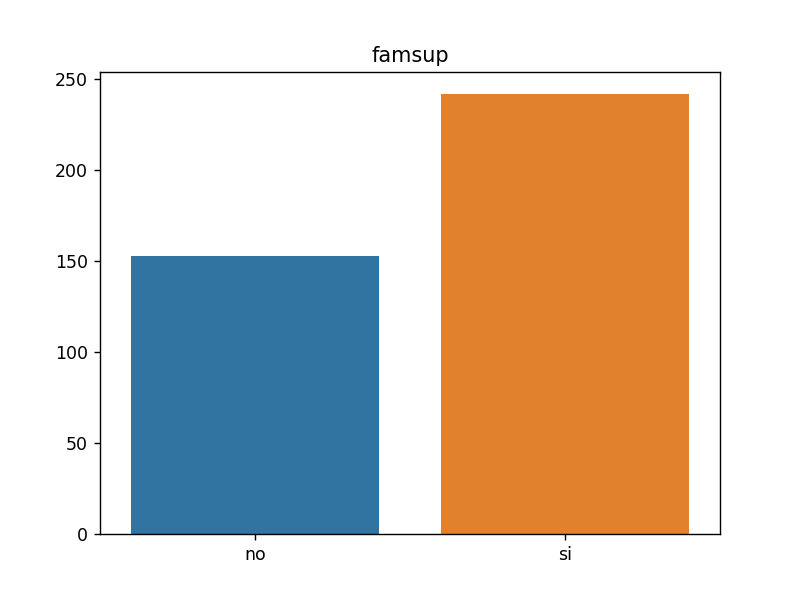

activities
No:  194
Yes:  201


<IPython.core.display.Javascript object>


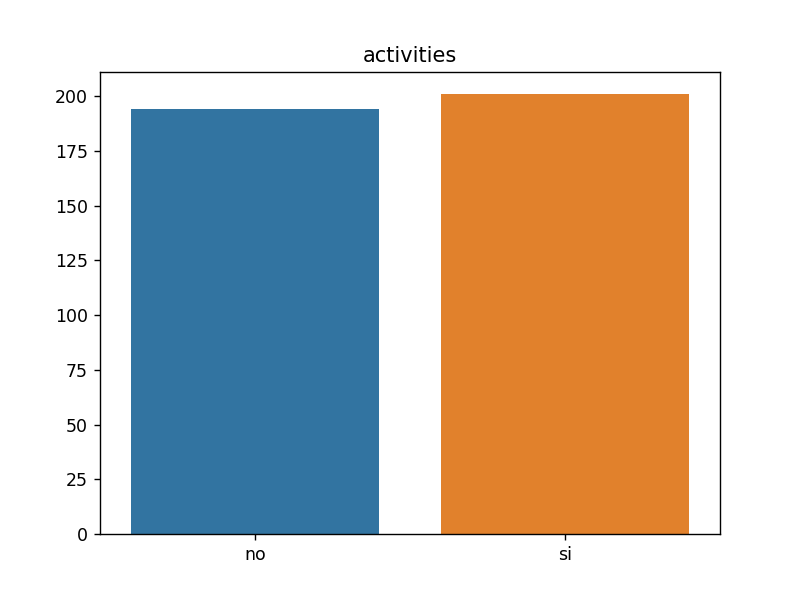

paid
No:  214
Yes:  181


<IPython.core.display.Javascript object>


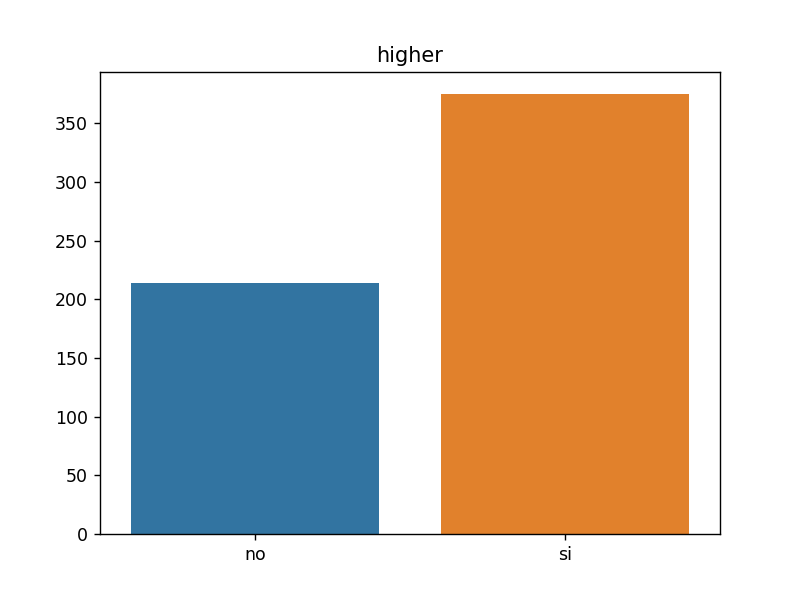

romantic
No:  263
Yes:  132


<IPython.core.display.Javascript object>


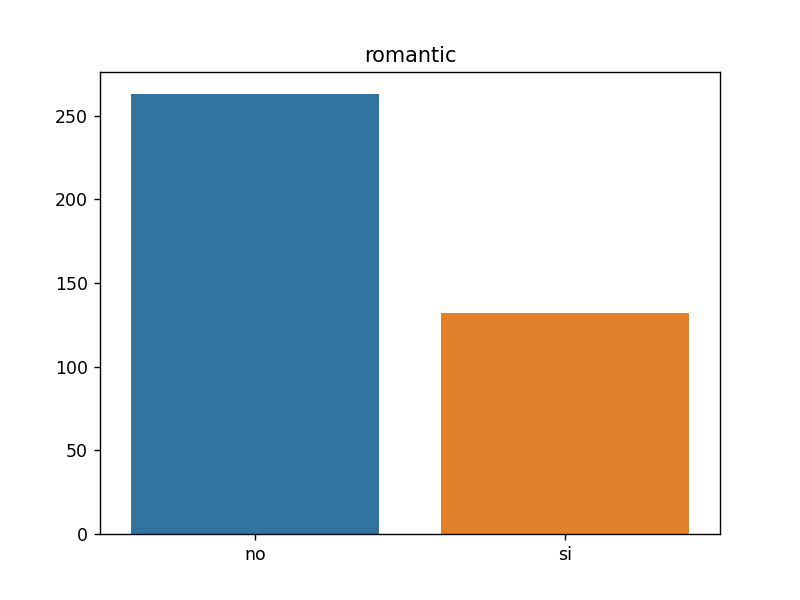

<AxesSubplot: title={'center': 'romantic'}>

In [7]:
list_yn = ['schoolsup', 'famsup', 'activities', 'paid', 'internet', 'higher', 'romantic']
#print(df.columns)

print("famsup")
suma0 = sum(1 for x in df.iloc[:, 13].values if x == 0)
suma1 = sum(1 for x in df.iloc[:, 13].values if x == 1)
print("No: ", suma0)
print("Yes: ", suma1)
plt.figure()
plt.title("famsup")
sns.barplot(x=['no', 'si'], y=[suma0, suma1])

print("activities")
suma0 = sum(1 for x in df.iloc[:, 15].values if x == 0)
suma1 = sum(1 for x in df.iloc[:, 15].values if x == 1)
print("No: ", suma0)
print("Yes: ", suma1)
plt.figure()
plt.title("activities")
sns.barplot(x=['no', 'si'], y=[suma0, suma1])

print("paid")
suma0 = sum(1 for x in df.iloc[:, 14].values if x == 0)
suma1 = sum(1 for x in df.iloc[:, 14].values if x == 1)
print("No: ", suma0)
print("Yes: ", suma1)
plt.figure()
plt.title("paid")
sns.barplot(x=['no', 'si'], y=[suma0, suma1])

print("romantic")
suma0 = sum(1 for x in df.iloc[:, 18].values if x == 0)
suma1 = sum(1 for x in df.iloc[:, 18].values if x == 1)
print("No: ", suma0)
print("Yes: ", suma1)
plt.figure()
plt.title("romantic")
sns.barplot(x=['no', 'si'], y=[suma0, suma1])

Pstatus
No:  41
Yes:  354


<IPython.core.display.Javascript object>


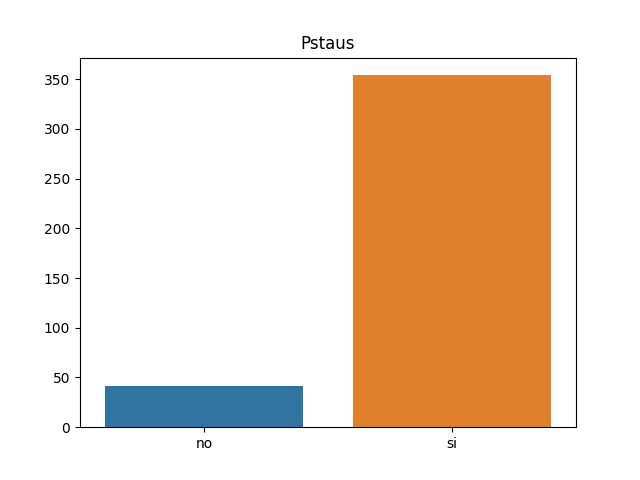

<IPython.core.display.Javascript object>


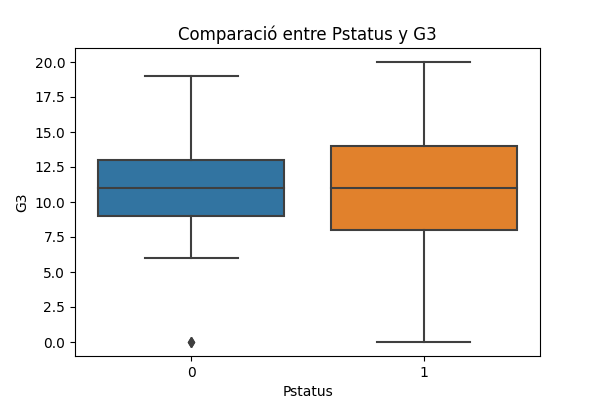

sex
No:  208
Yes:  187


<IPython.core.display.Javascript object>


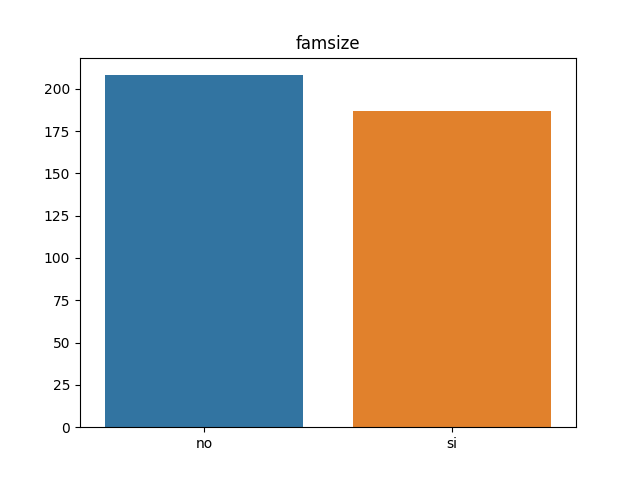

<IPython.core.display.Javascript object>


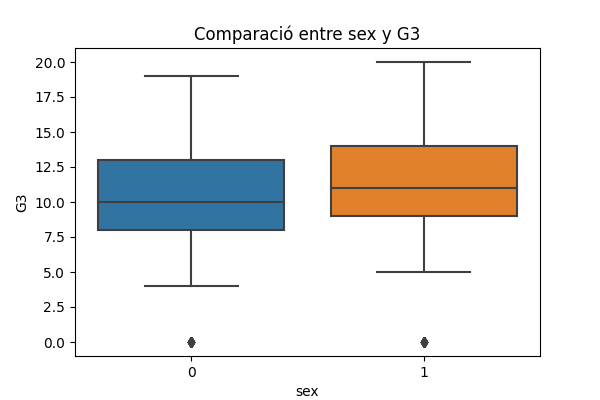

In [7]:
print("Pstatus")
suma0 = sum(1 for x in df.iloc[:, 3].values if x == 0)
suma1 = sum(1 for x in df.iloc[:, 3].values if x == 1)
print("No: ", suma0)
print("Yes: ", suma1)
plt.figure()
plt.title("Pstaus")
sns.barplot(x=['no', 'si'], y=[suma0, suma1])

plt.figure(figsize=(6,4))
grafica = sns.boxplot(x = "Pstatus", y = "G3", data=df)
plt.title('Comparació entre Pstatus y G3')
plt.show()

print("sex")
suma0 = sum(1 for x in df.iloc[:, 0].values if x == 0)
suma1 = sum(1 for x in df.iloc[:, 0].values if x == 1)
print("No: ", suma0)
print("Yes: ", suma1)
plt.figure()
plt.title("famsize")
sns.barplot(x=['no', 'si'], y=[suma0, suma1])

plt.figure(figsize=(6,4))
grafica = sns.boxplot(x = "sex", y = "G3", data=df)
plt.title('Comparació entre sex y G3')
plt.show()

famsize
No:  281
Yes:  114


<IPython.core.display.Javascript object>


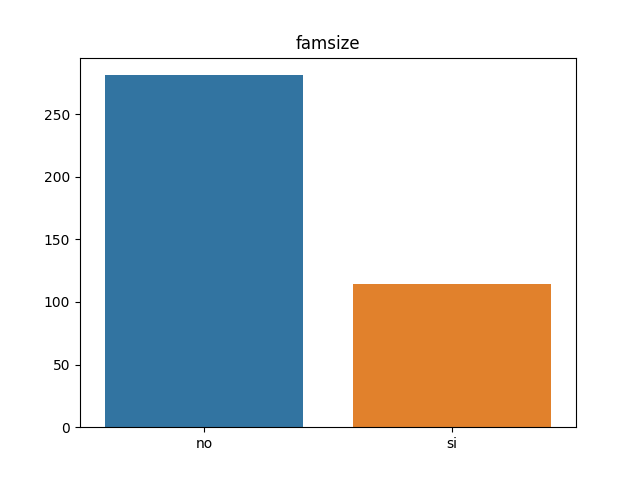

<IPython.core.display.Javascript object>


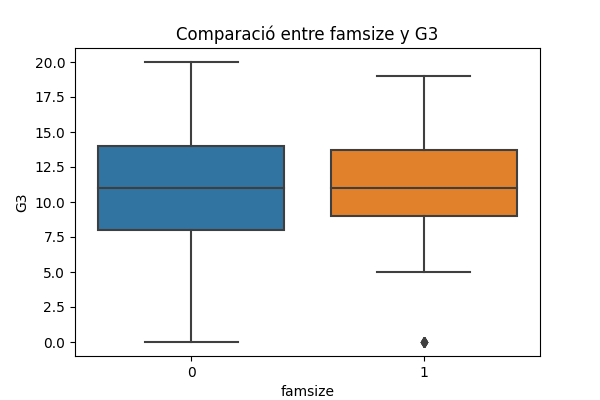

In [8]:
print("famsize")
suma0 = sum(1 for x in df.iloc[:, 2].values if x == 0)
suma1 = sum(1 for x in df.iloc[:, 2].values if x == 1)
print("No: ", suma0)
print("Yes: ", suma1)
plt.figure()
plt.title("famsize")
sns.barplot(x=['no', 'si'], y=[suma0, suma1])

plt.figure(figsize=(6,4))
grafica = sns.boxplot(x = "famsize", y = "G3", data=df)
plt.title('Comparació entre famsize y G3')
plt.show()

schoolsup
No:  344
Yes:  51


<IPython.core.display.Javascript object>


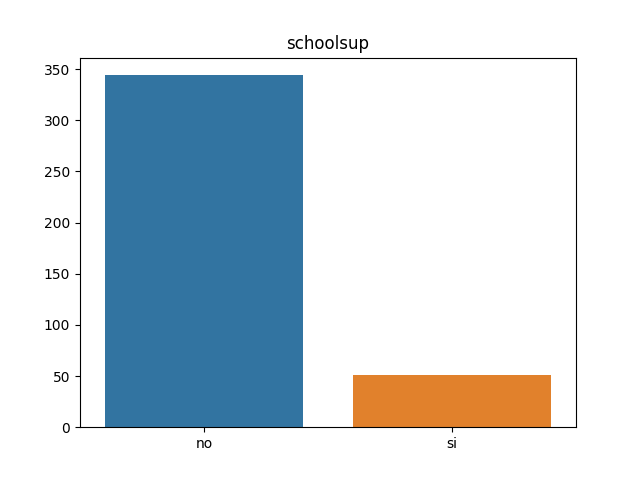

<IPython.core.display.Javascript object>


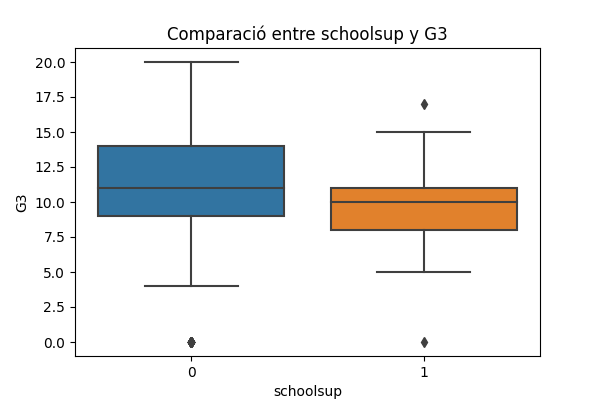

In [9]:
print("schoolsup")
suma0 = sum(1 for x in df.iloc[:, 12].values if x == 0)
suma1 = sum(1 for x in df.iloc[:, 12].values if x == 1)
print("No: ", suma0)
print("Yes: ", suma1)
plt.figure()
plt.title("schoolsup")
sns.barplot(x=['no', 'si'], y=[suma0, suma1])

plt.figure(figsize=(6,4))
grafica = sns.boxplot(x = "schoolsup", y = "G3", data=df)
plt.title('Comparació entre schoolsup y G3')
plt.show()

higher
No:  20
Yes:  375


<IPython.core.display.Javascript object>


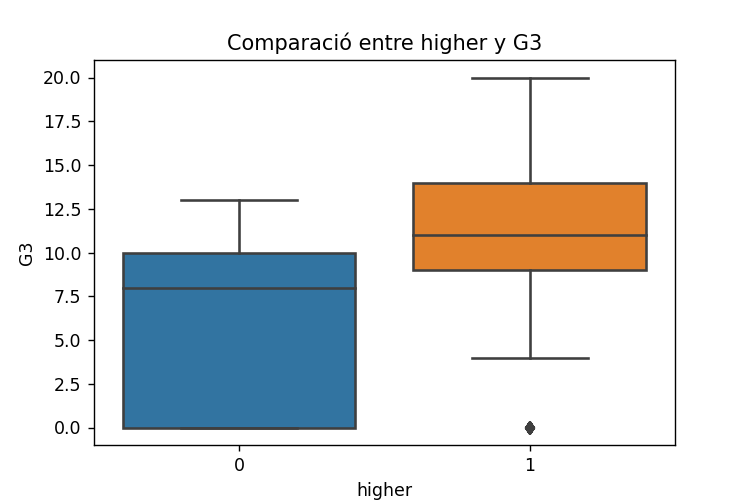

In [11]:
print("higher")
suma0 = sum(1 for x in df.iloc[:, 16].values if x == 0)
suma1 = sum(1 for x in df.iloc[:, 16].values if x == 1)
print("No: ", suma0)
print("Yes: ", suma1)
plt.figure(3)
plt.title("higher")
sns.barplot(x=['no', 'si'], y=[suma0, suma1])
plt.show()

plt.figure(figsize=(6,4))
grafica = sns.boxplot(x = "higher", y = "G3", data=df)
plt.title('Comparació entre higher y G3')
plt.show()

internet
No:  66
Yes:  329


<IPython.core.display.Javascript object>


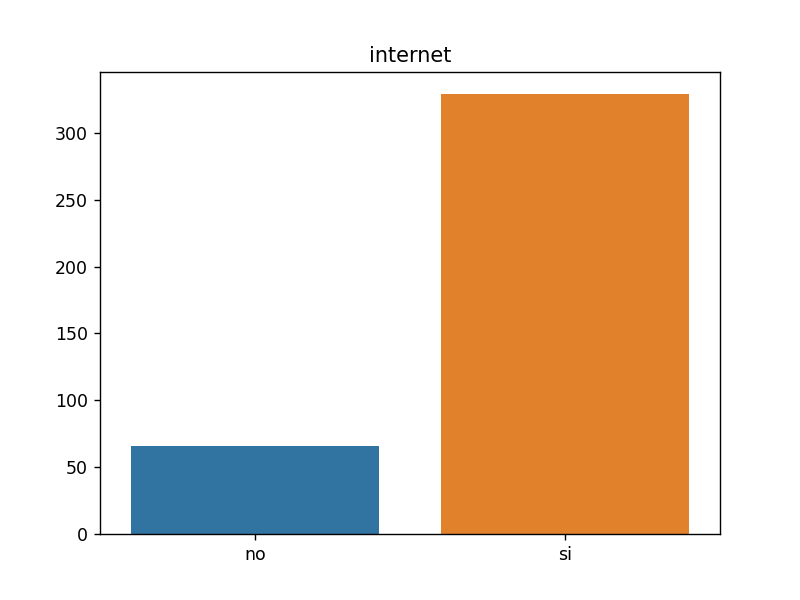

<IPython.core.display.Javascript object>


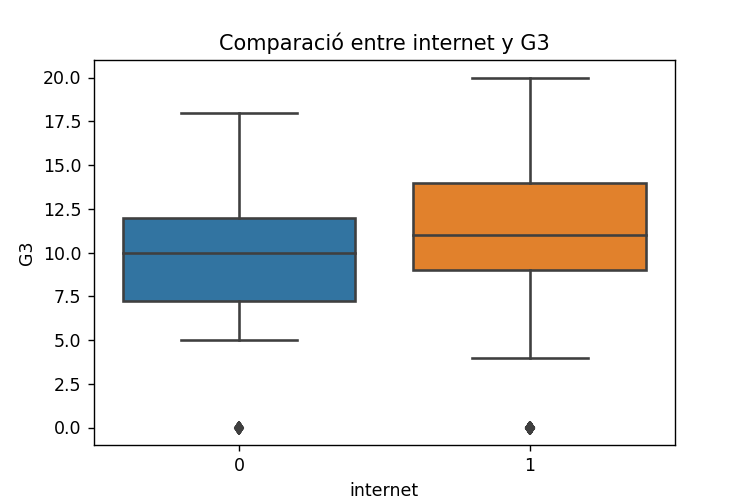

In [12]:
print("internet")
suma0 = sum(1 for x in df.iloc[:, 17].values if x == 0)
suma1 = sum(1 for x in df.iloc[:, 17].values if x == 1)
print("No: ", suma0)
print("Yes: ", suma1)

plt.figure()
plt.title("internet")
sns.barplot(x=['no', 'si'], y=[suma0, suma1])

plt.figure(figsize=(6,4))
grafica = sns.boxplot(x = "internet", y = "G3", data=df)
plt.title('Comparació entre internet y G3')
plt.show()

<IPython.core.display.Javascript object>


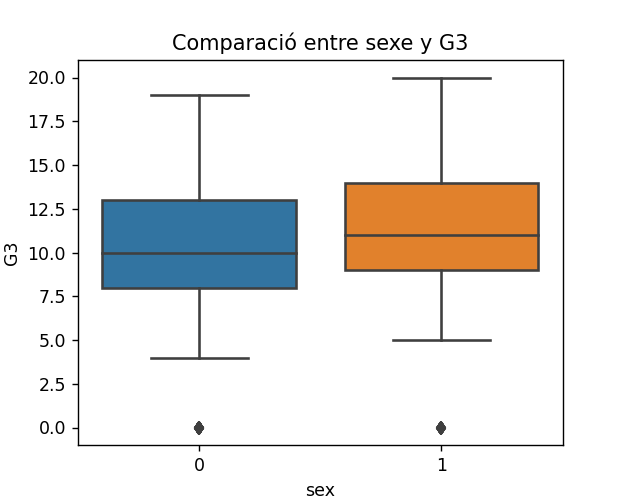

In [13]:
plt.figure(figsize=(5,4))
data = [sum(1 for i in df.iloc[:, 1].values if i == 0), sum(1 for i in df.iloc[:, 1].values if i == 1)]
grafica = sns.boxplot(x = "sex", y = "G3", data=df)
plt.title('Comparació entre sexe y G3')
plt.show()

Eliminem els atributs Pstatus i famsize. 

In [10]:
df = df.drop('Pstatus', axis = 1)
df = df.drop('famsize', axis = 1)
df.head()

sex  age  Medu  Fedu     Mjob      Fjob guardian  traveltime  studytime  \
0    0   18     4     4  at_home   teacher   mother           2          2   
1    0   17     1     1  at_home     other   father           1          2   
2    0   15     1     1  at_home     other   mother           1          2   
3    0   15     4     2   health  services   mother           1          3   
4    0   16     3     3    other     other   father           1          2   

   failures  ...  famrel  freetime  goout  Dalc  Walc  health  absences  G1  \
0         0  ...       4         3      4     1     1       3         6   5   
1         0  ...       5         3      3     1     1       3         4   5   
2         3  ...       4         3      2     2     3       3        10   7   
3         0  ...       3         2      2     1     1       5         2  15   
4         0  ...       4         3      2     1     2       5         4   6   

   G2  G3  
0   6   6  
1   5   6  
2   8  10  
3  14  15  
4  10  10  

[5 rows x 27 columns]

In [50]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    int64 
 1   age         395 non-null    int64 
 2   Medu        395 non-null    int64 
 3   Fedu        395 non-null    int64 
 4   Mjob        395 non-null    object
 5   Fjob        395 non-null    object
 6   guardian    395 non-null    object
 7   traveltime  395 non-null    int64 
 8   studytime   395 non-null    int64 
 9   failures    395 non-null    int64 
 10  schoolsup   395 non-null    int64 
 11  famsup      395 non-null    int64 
 12  paid        395 non-null    int64 
 13  activities  395 non-null    int64 
 14  higher      395 non-null    int64 
 15  internet    395 non-null    int64 
 16  romantic    395 non-null    int64 
 17  famrel      395 non-null    int64 
 18  freetime    395 non-null    int64 
 19  goout       395 non-null    int64 
 20  Dalc      

In [16]:
print("Informació sobre les dades:")
df.describe()

Informació sobre les dades:


sex     age    Medu    Fedu  traveltime  studytime  failures  \
count 395.000 395.000 395.000 395.000     395.000    395.000   395.000   
mean    0.473  16.696   2.749   2.522       1.448      2.035     0.334   
std     0.500   1.276   1.095   1.088       0.698      0.839     0.744   
min     0.000  15.000   0.000   0.000       1.000      1.000     0.000   
25%     0.000  16.000   2.000   2.000       1.000      1.000     0.000   
50%     0.000  17.000   3.000   2.000       1.000      2.000     0.000   
75%     1.000  18.000   4.000   3.000       2.000      2.000     0.000   
max     1.000  22.000   4.000   4.000       4.000      4.000     3.000   

       schoolsup  famsup    paid  ...  famrel  freetime   goout    Dalc  \
count    395.000 395.000 395.000  ... 395.000   395.000 395.000 395.000   
mean       0.129   0.613   0.458  ...   3.944     3.235   3.109   1.481   
std        0.336   0.488   0.499  ...   0.897     0.999   1.113   0.891   
min        0.000   0.000   0.000  ...   1.000     1.000   1.000   1.000   
25%        0.000   0.000   0.000  ...   4.000     3.000   2.000   1.000   
50%        0.000   1.000   0.000  ...   4.000     3.000   3.000   1.000   
75%        0.000   1.000   1.000  ...   5.000     4.000   4.000   2.000   
max        1.000   1.000   1.000  ...   5.000     5.000   5.000   5.000   

         Walc  health  absences      G1      G2      G3  
count 395.000 395.000   395.000 395.000 395.000 395.000  
mean    2.291   3.554     5.709  10.909  10.714  10.415  
std     1.288   1.390     8.003   3.319   3.762   4.581  
min     1.000   1.000     0.000   3.000   0.000   0.000  
25%     1.000   3.000     0.000   8.000   9.000   8.000  
50%     2.000   4.000     4.000  11.000  11.000  11.000  
75%     3.000   5.000     8.000  13.000  13.000  14.000  
max     5.000   5.000    75.000  19.000  19.000  20.000  

[8 rows x 24 columns]

Tractem els atributs de tipus categoric que no ens serveixen per fer el model de regressió lineal. 

In [11]:
def categorical_to_numerical(dataset, nom_columna):
    dummy = pd.get_dummies(dataset[nom_columna], prefix = nom_columna)
    dataset = dataset.drop(nom_columna, axis = 1)
    dataset = pd.concat([dataset,dummy], axis = 1)
    return dataset

for i in df.columns:
    if (df[i].dtype=='object'):
        df = categorical_to_numerical(df,i)
        
l_column = list(df.columns)
data = df.values
y = data[:, 23]  # atribut G3
x = np.delete(data, 23, axis = 1) # tot menys G3

print("Per visualitzar les primeres 5 mostres de la NOSTRA BBDD:")
df.head()

Per visualitzar les primeres 5 mostres de la NOSTRA BBDD:


sex  age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  \
0    0   18     4     4           2          2         0          1       0   
1    0   17     1     1           1          2         0          0       1   
2    0   15     1     1           1          2         3          1       0   
3    0   15     4     2           1          3         0          0       1   
4    0   16     3     3           1          2         0          0       1   

   paid  ...  Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  \
0     0  ...              0             0             0            0   
1     0  ...              0             0             0            0   
2     1  ...              0             0             0            0   
3     1  ...              0             0             0            0   
4     1  ...              0             0             0            0   

   Fjob_other  Fjob_services  Fjob_teacher  guardian_father  guardian_mother  \
0           0              0             1                0                1   
1           1              0             0                1                0   
2           1              0             0                0                1   
3           0              1             0                0                1   
4           1              0             0                1                0   

   guardian_other  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 37 columns]

Despres de manipular les dades obtenim la següent base de dades amb totes aquestes de tipus numeric.

In [18]:
df.columns

Index(['sex', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'guardian_father', 'guardian_mother', 'guardian_other'],
      dtype='object')

Mostrem atribit age, en funció de G3


<IPython.core.display.Javascript object>


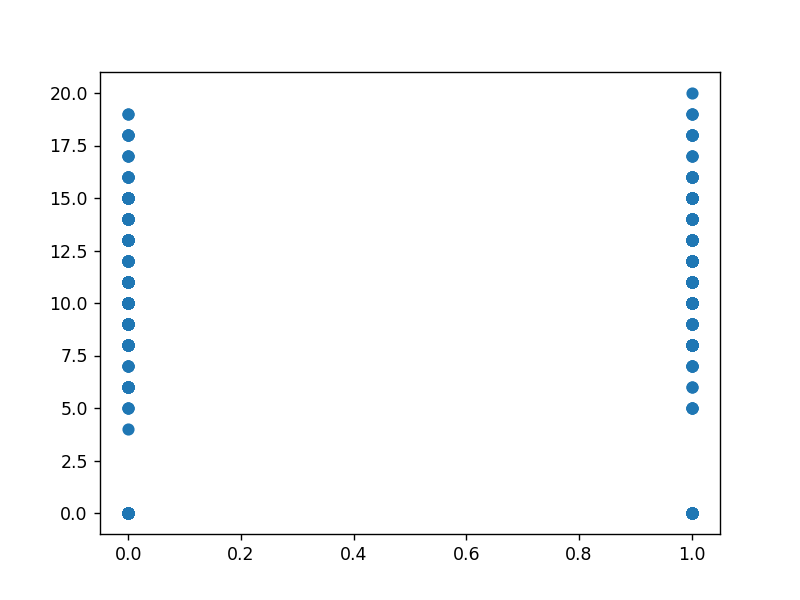

In [19]:
print("Mostrem atribit age, en funció de G3")
plt.figure()
axN = plt.scatter(x[:,0], y)

Dels atributs que a la web ens semblen que segeuxien una distribució normal, apliquem un test de normalitat amb alpha = 0.05 i mostrem els resultats. 

<IPython.core.display.Javascript object>


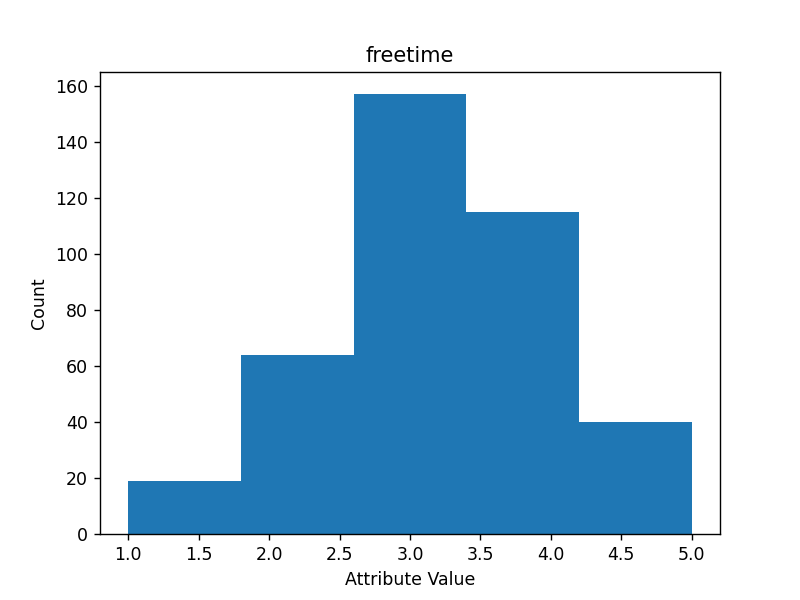

Si segueix una distribució normal


<IPython.core.display.Javascript object>


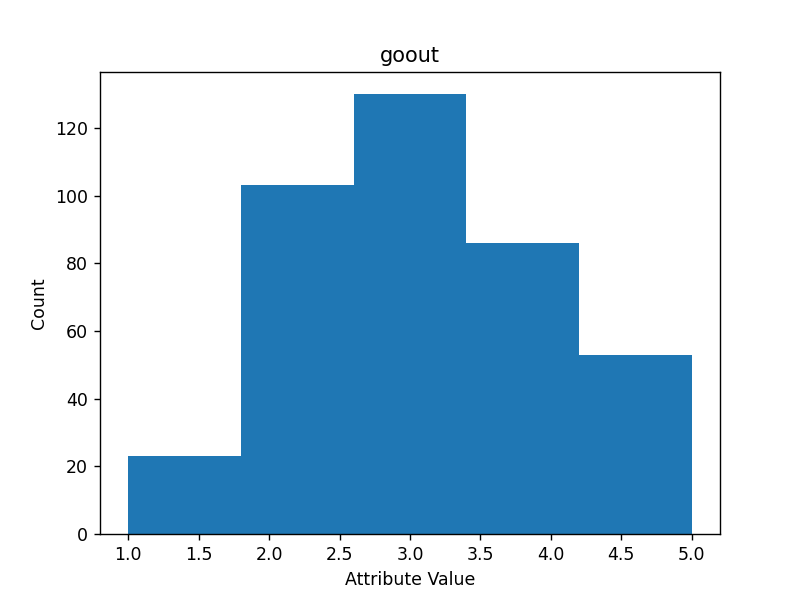

No segueix una distribució normal


<IPython.core.display.Javascript object>


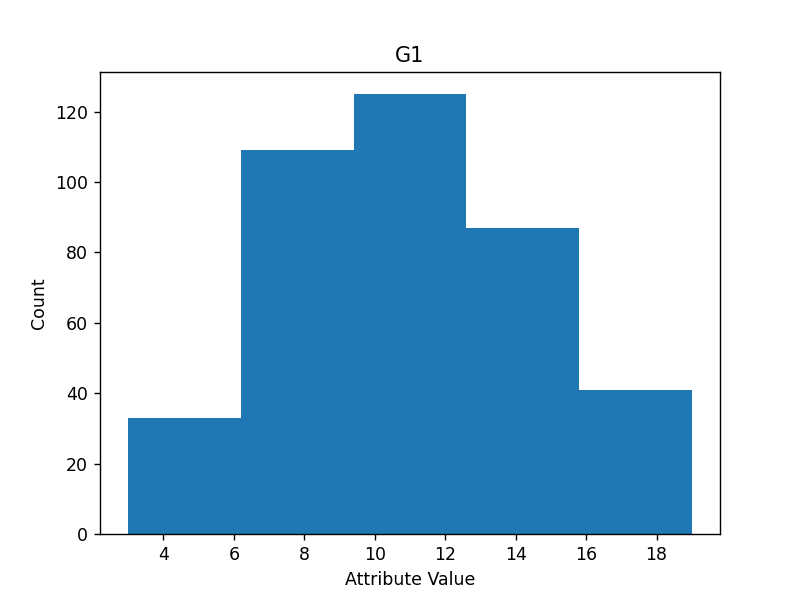

No segueix una distribució normal


<IPython.core.display.Javascript object>


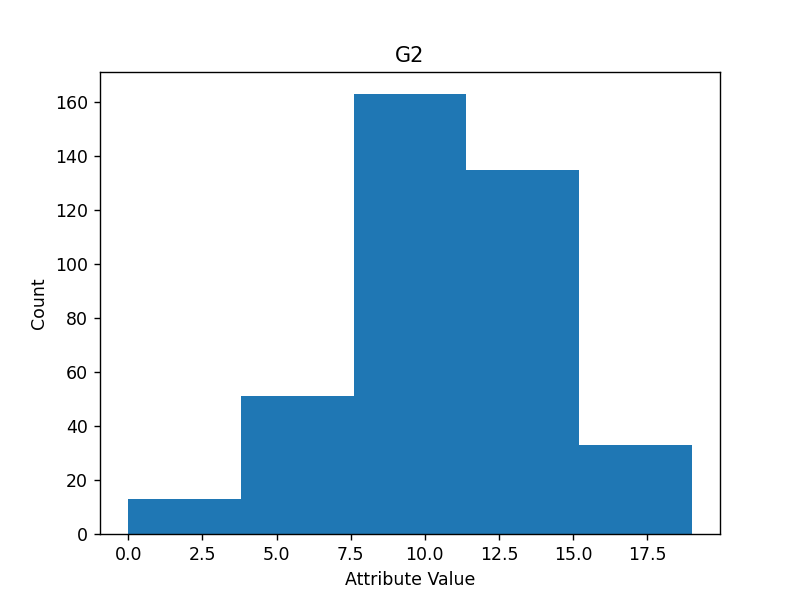

No segueix una distribució normal


In [52]:
## Atributs que podrien seguir una distribució normal
list1 = [15,16,21,22]

for i in list1: 
    plt.figure()
    plt.title(df.columns[i])
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    histN = plt.hist(x[:,i], bins=5, range=[np.min(x[:,i]), np.max(x[:,i])], histtype="bar", rwidth=12)
    stat,p=normaltest(x[:,i])
    alpha = 0.05
    if p < alpha:
        print('No segueix una distribució normal')
    else:
        print('Si segueix una distribució normal')

Estudiem la correlació entre els diferents atributs per tal de saber si estan molt o poc relacionats entre ells. Com la visualització de la matriu de correlació amb tots els atributs es dolenta, visualitzarem la correlació per grups. Tenint sempre en compte l'atribut objectiu G3. 

In [21]:
df.head()

sex  age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  \
0    0   18     4     4           2          2         0          1       0   
1    0   17     1     1           1          2         0          0       1   
2    0   15     1     1           1          2         3          1       0   
3    0   15     4     2           1          3         0          0       1   
4    0   16     3     3           1          2         0          0       1   

   paid  ...  Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  \
0     0  ...              0             0             0            0   
1     0  ...              0             0             0            0   
2     1  ...              0             0             0            0   
3     1  ...              0             0             0            0   
4     1  ...              0             0             0            0   

   Fjob_other  Fjob_services  Fjob_teacher  guardian_father  guardian_mother  \
0           0              0             1                0                1   
1           1              0             0                1                0   
2           1              0             0                0                1   
3           0              1             0                0                1   
4           1              0             0                1                0   

   guardian_other  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 37 columns]

In [22]:
df.columns


Index(['sex', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'guardian_father', 'guardian_mother', 'guardian_other'],
      dtype='object')

Oversampling: dupliquem mostres que tenen l'atribut higher a 0.

In [26]:
no_higher = df.loc[:, 'higher'] == 0
df_no_higher = df.loc[no_higher]
print(df_no_higher)

df = pd.concat([df, df_no_higher, df_no_higher], axis = 0)
df

     sex  age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  \
78     1   17     2     1           2          1         3          1       1   
127    0   19     0     1           1          2         3          0       1   
148    1   16     4     4           1          1         0          0       1   
150    1   18     1     1           1          1         3          0       0   
153    1   19     3     2           1          1         3          0       1   
160    1   17     2     1           2          1         2          0       0   
163    1   17     1     3           1          1         0          0       0   
164    1   17     1     1           4          2         3          0       0   
165    1   16     3     2           2          1         1          0       1   
166    1   16     2     2           1          2         0          0       0   
239    1   18     2     2           1          2         1          0       0   
247    1   22     3     1   

sex  age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  \
0      0   18     4     4           2          2         0          1       0   
1      0   17     1     1           1          2         0          0       1   
2      0   15     1     1           1          2         3          1       0   
3      0   15     4     2           1          3         0          0       1   
4      0   16     3     3           1          2         0          0       1   
..   ...  ...   ...   ...         ...        ...       ...        ...     ...   
276    0   18     3     2           2          2         0          0       0   
311    0   19     2     1           3          2         0          0       1   
352    1   18     1     3           1          1         1          0       0   
361    1   18     1     1           2          2         1          0       0   
371    1   18     1     2           3          1         0          0       1   

     paid  ...  Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  \
0       0  ...            0           0              0             1   
1       0  ...            0           1              0             0   
2       1  ...            0           1              0             0   
3       1  ...            0           0              1             0   
4       1  ...            0           1              0             0   
..    ...  ...          ...         ...            ...           ...   
276     0  ...            0           0              1             0   
311     0  ...            0           1              0             0   
352     0  ...            0           0              1             0   
361     0  ...            0           1              0             0   
371     1  ...            0           0              1             0   

     guardian_father  guardian_mother  guardian_other  G1  G2  G3  
0                  0                1               0   5   6   6  
1                  1                0               0   5   5   6  
2                  0                1               0   7   8  10  
3                  0                1               0  15  14  15  
4                  1                0               0   6  10  10  
..               ...              ...             ...  ..  ..  ..  
276                0                1               0  10   9   9  
311                0                0               1  14  12  13  
352                0                1               0   8   7   8  
361                0                1               0  13  12  12  
371                1                0               0  14  12  12  

[495 rows x 37 columns]

Posem G1, G2 i G3 al final del dataset.

In [12]:
G3, G2, G1 = df.pop("G3"), df.pop("G2"), df.pop("G1")
df['G1'] = G1
df['G2'] = G2
df['G3'] = G3

df.head()

sex  age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  \
0    0   18     4     4           2          2         0          1       0   
1    0   17     1     1           1          2         0          0       1   
2    0   15     1     1           1          2         3          1       0   
3    0   15     4     2           1          3         0          0       1   
4    0   16     3     3           1          2         0          0       1   

   paid  ...  Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  \
0     0  ...            0           0              0             1   
1     0  ...            0           1              0             0   
2     1  ...            0           1              0             0   
3     1  ...            0           0              1             0   
4     1  ...            0           1              0             0   

   guardian_father  guardian_mother  guardian_other  G1  G2  G3  
0                0                1               0   5   6   6  
1                1                0               0   5   5   6  
2                0                1               0   7   8  10  
3                0                1               0  15  14  15  
4                1                0               0   6  10  10  

[5 rows x 37 columns]

Correlació més alta


<IPython.core.display.Javascript object>


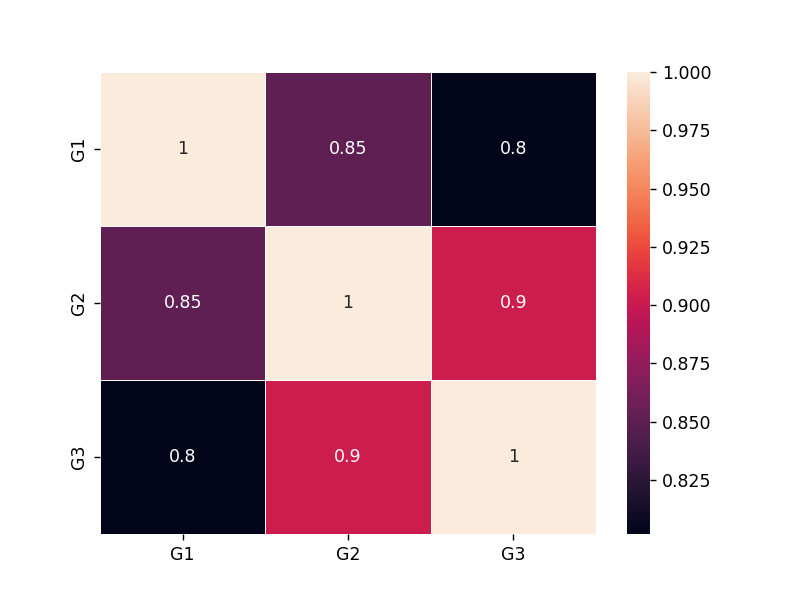

De l'atribut 0 a l'atribut 10 + datasetG


<IPython.core.display.Javascript object>


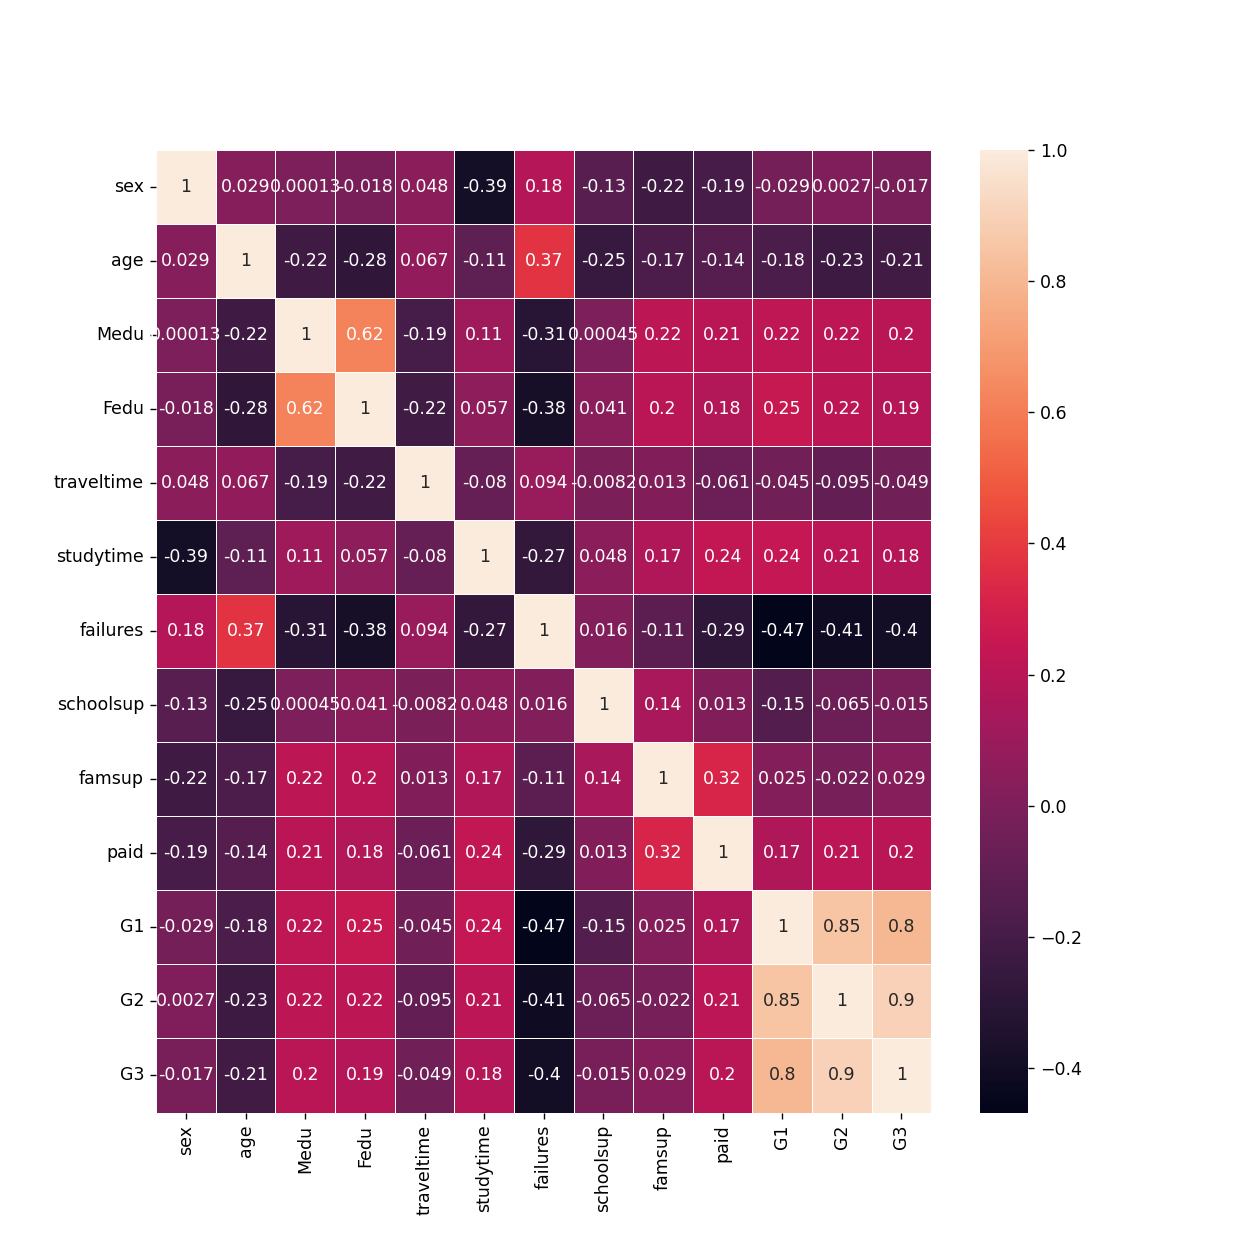

De l'atribut 11 a l'atribut 20 + datasetG


<IPython.core.display.Javascript object>


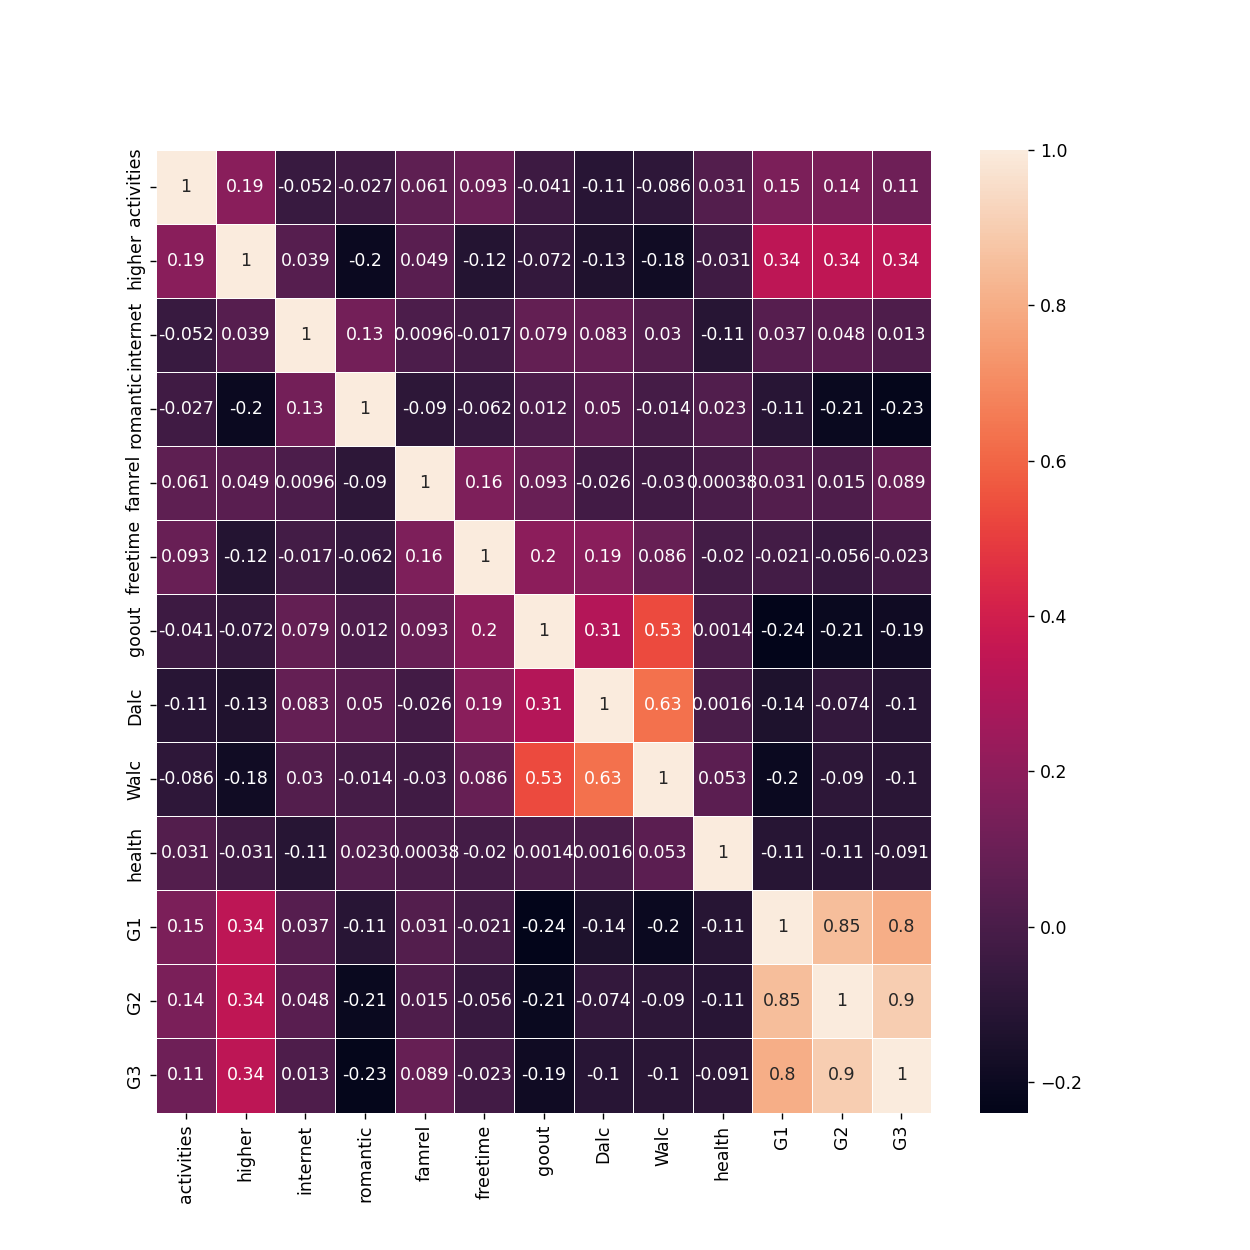

De l'atribut 21 a l'atribut 30 + datasetG


<IPython.core.display.Javascript object>


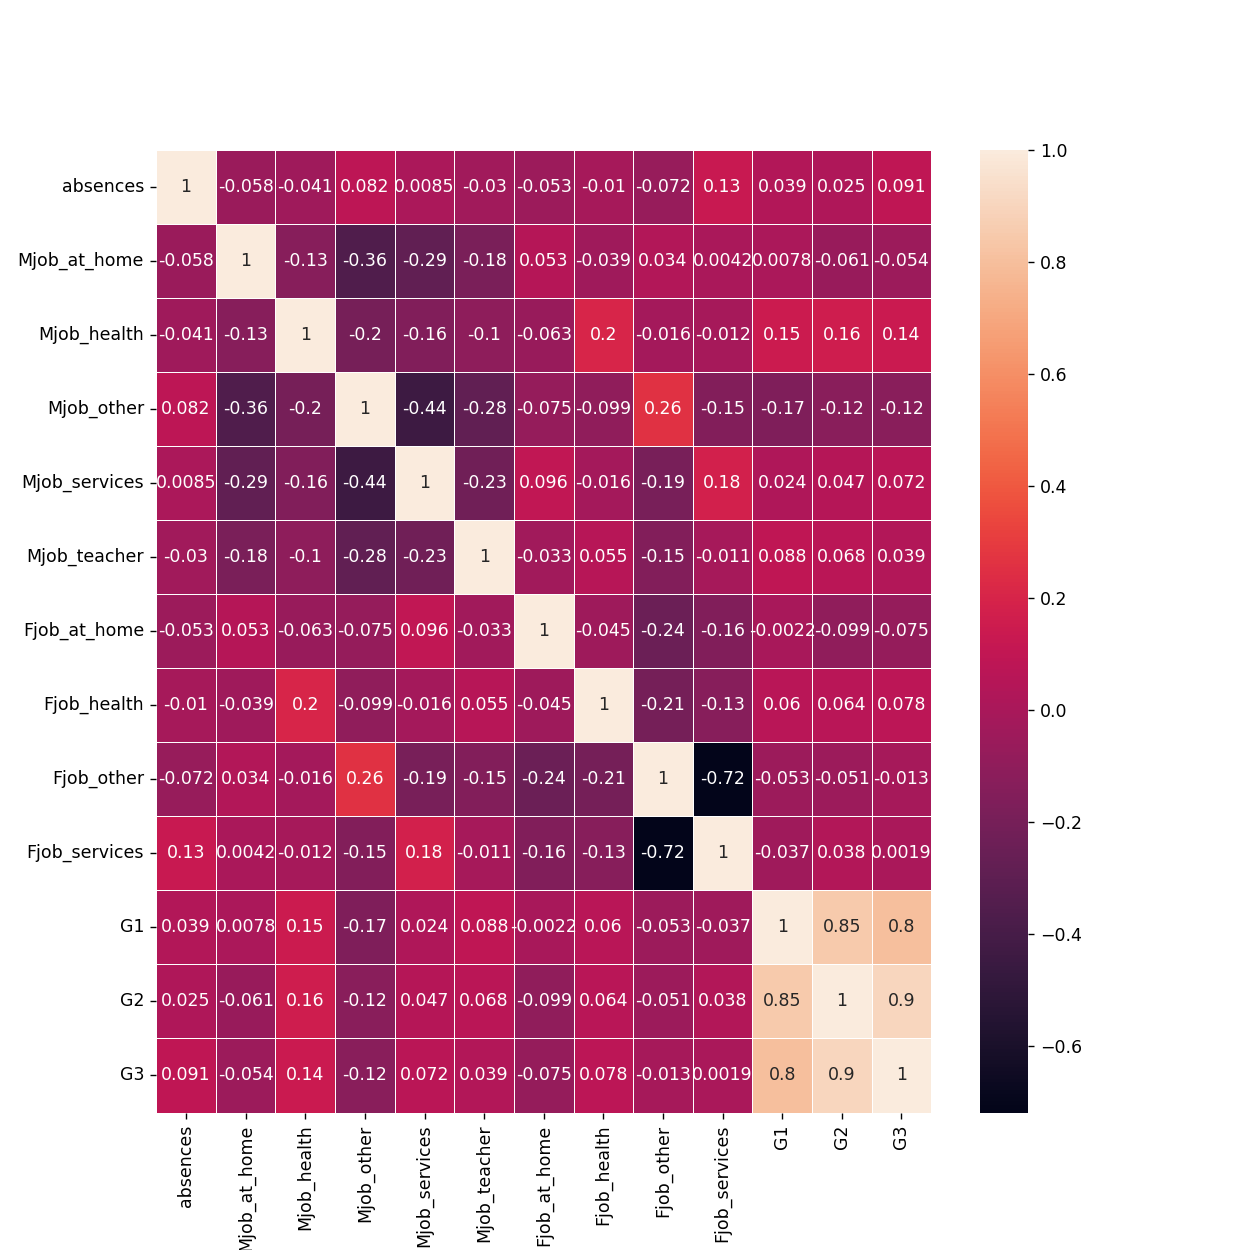

De l'atribut 31 a l'atribut 34 + datasetG


<IPython.core.display.Javascript object>


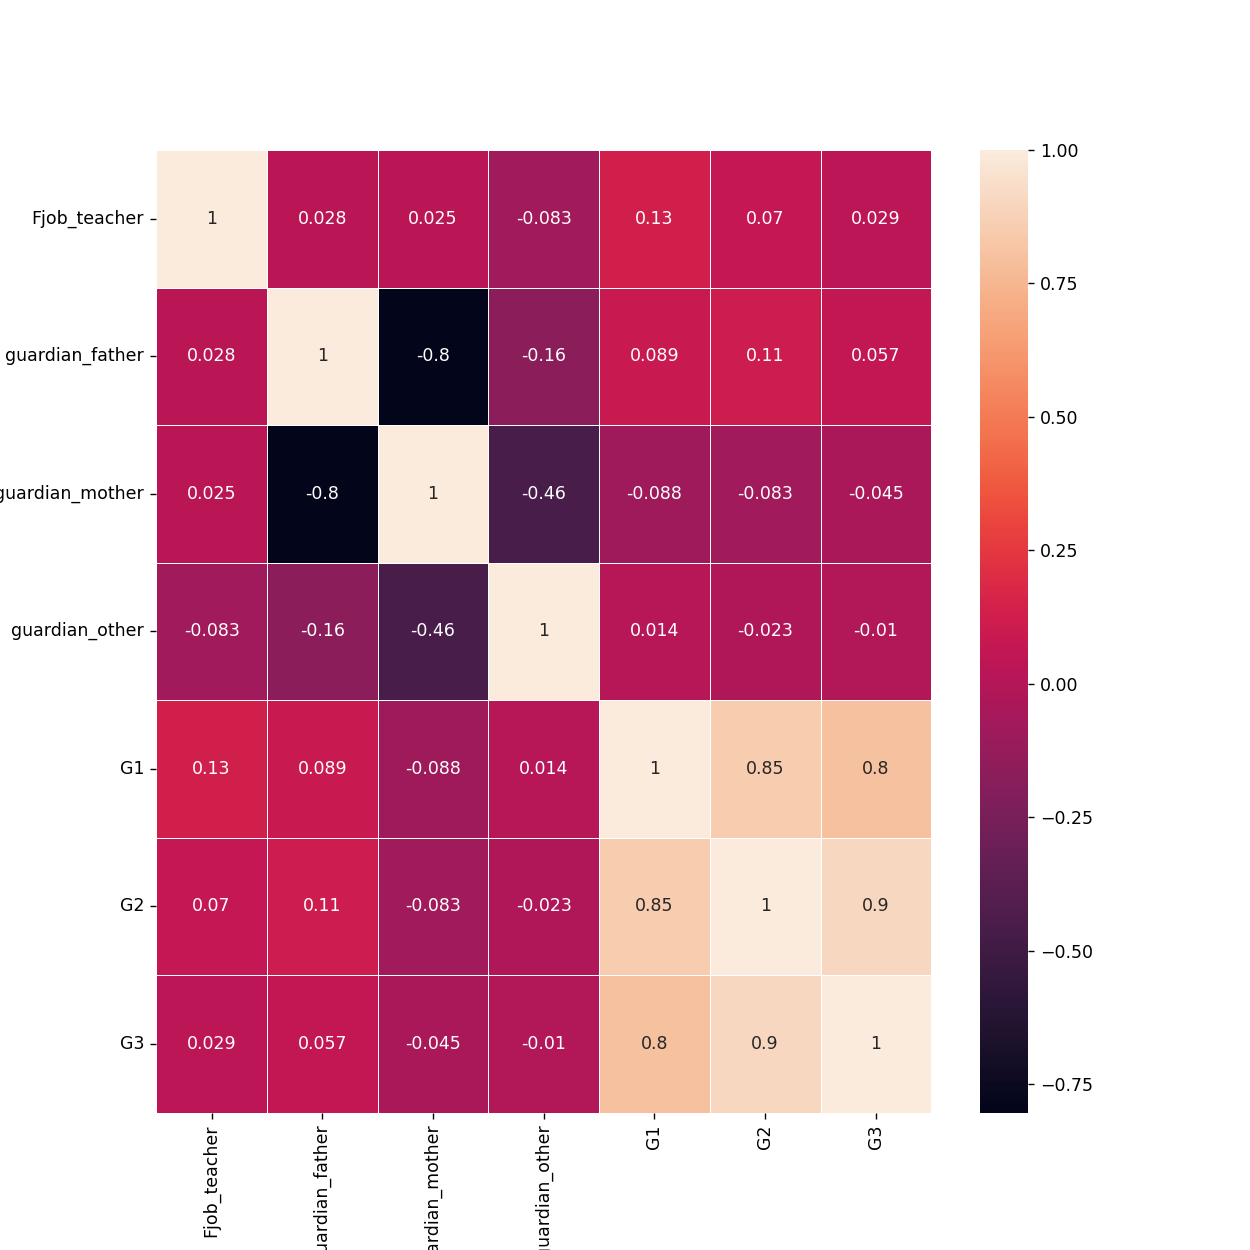

In [28]:

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades

print("Correlació més alta")
dataset_G = df.drop(df.columns[:34], axis = 1)
correlacio = dataset_G.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

print("De l'atribut 0 a l'atribut 10 + datasetG")
dataset1 = df.drop(df.columns[10:], axis = 1)
dataset1 = pd.concat([dataset1,dataset_G], axis = 1)
correlacio = dataset1.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

print("De l'atribut 11 a l'atribut 20 + datasetG")
dataset2 = df.drop(df.columns[:10], axis = 1)
dataset2 = dataset2.drop(df.columns[20:], axis = 1)
dataset2 = pd.concat([dataset2,dataset_G], axis = 1)
correlacio = dataset2.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

print("De l'atribut 21 a l'atribut 30 + datasetG")
dataset3 = df.drop(df.columns[:20], axis = 1)
dataset3 = dataset3.drop(df.columns[30:], axis = 1)
dataset3 = pd.concat([dataset3,dataset_G], axis = 1)
correlacio = dataset3.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

print("De l'atribut 31 a l'atribut 34 + datasetG")
dataset4 = df.drop(df.columns[:30], axis = 1)
correlacio = dataset4.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)


<IPython.core.display.Javascript object>


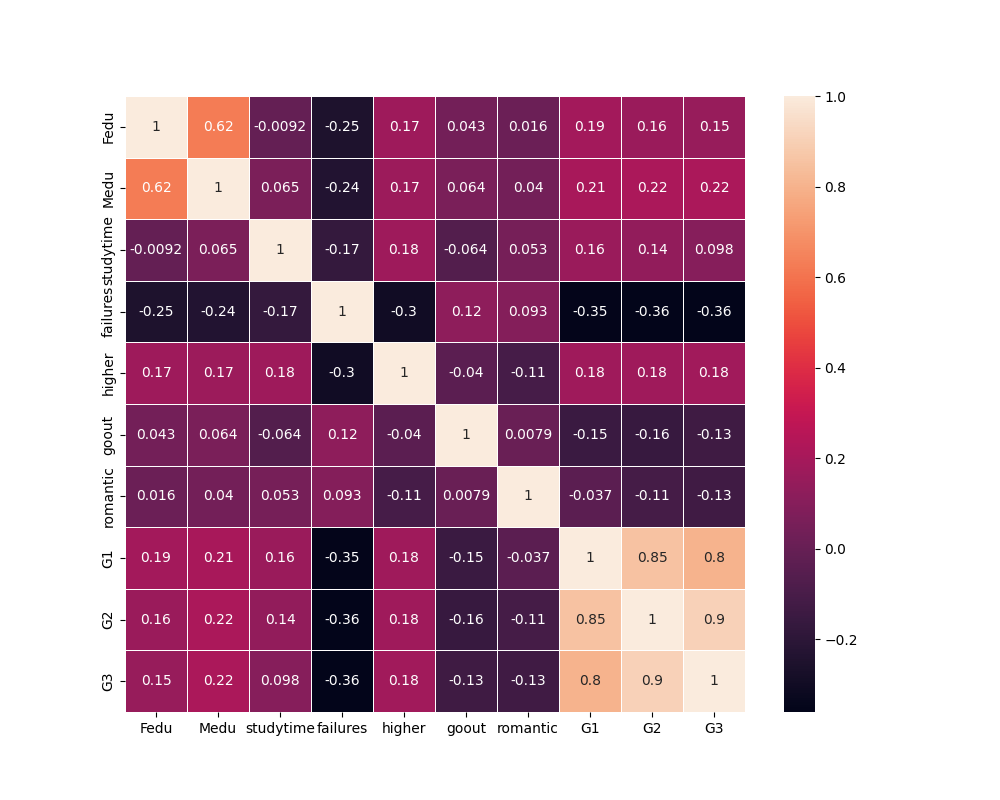

In [17]:
df_ca = pd.concat([df["Fedu"], df["Medu"], df["studytime"], df["failures"], df["higher"], df["goout"], df["romantic"], df["G1"], df["G2"], df["G3"]], axis = 1)
correlacio = df_ca.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)


Utilitzem la funció pairplot per tal de veure la distribució que segueixen els atributs amb més correlació del dataset.

<IPython.core.display.Javascript object>


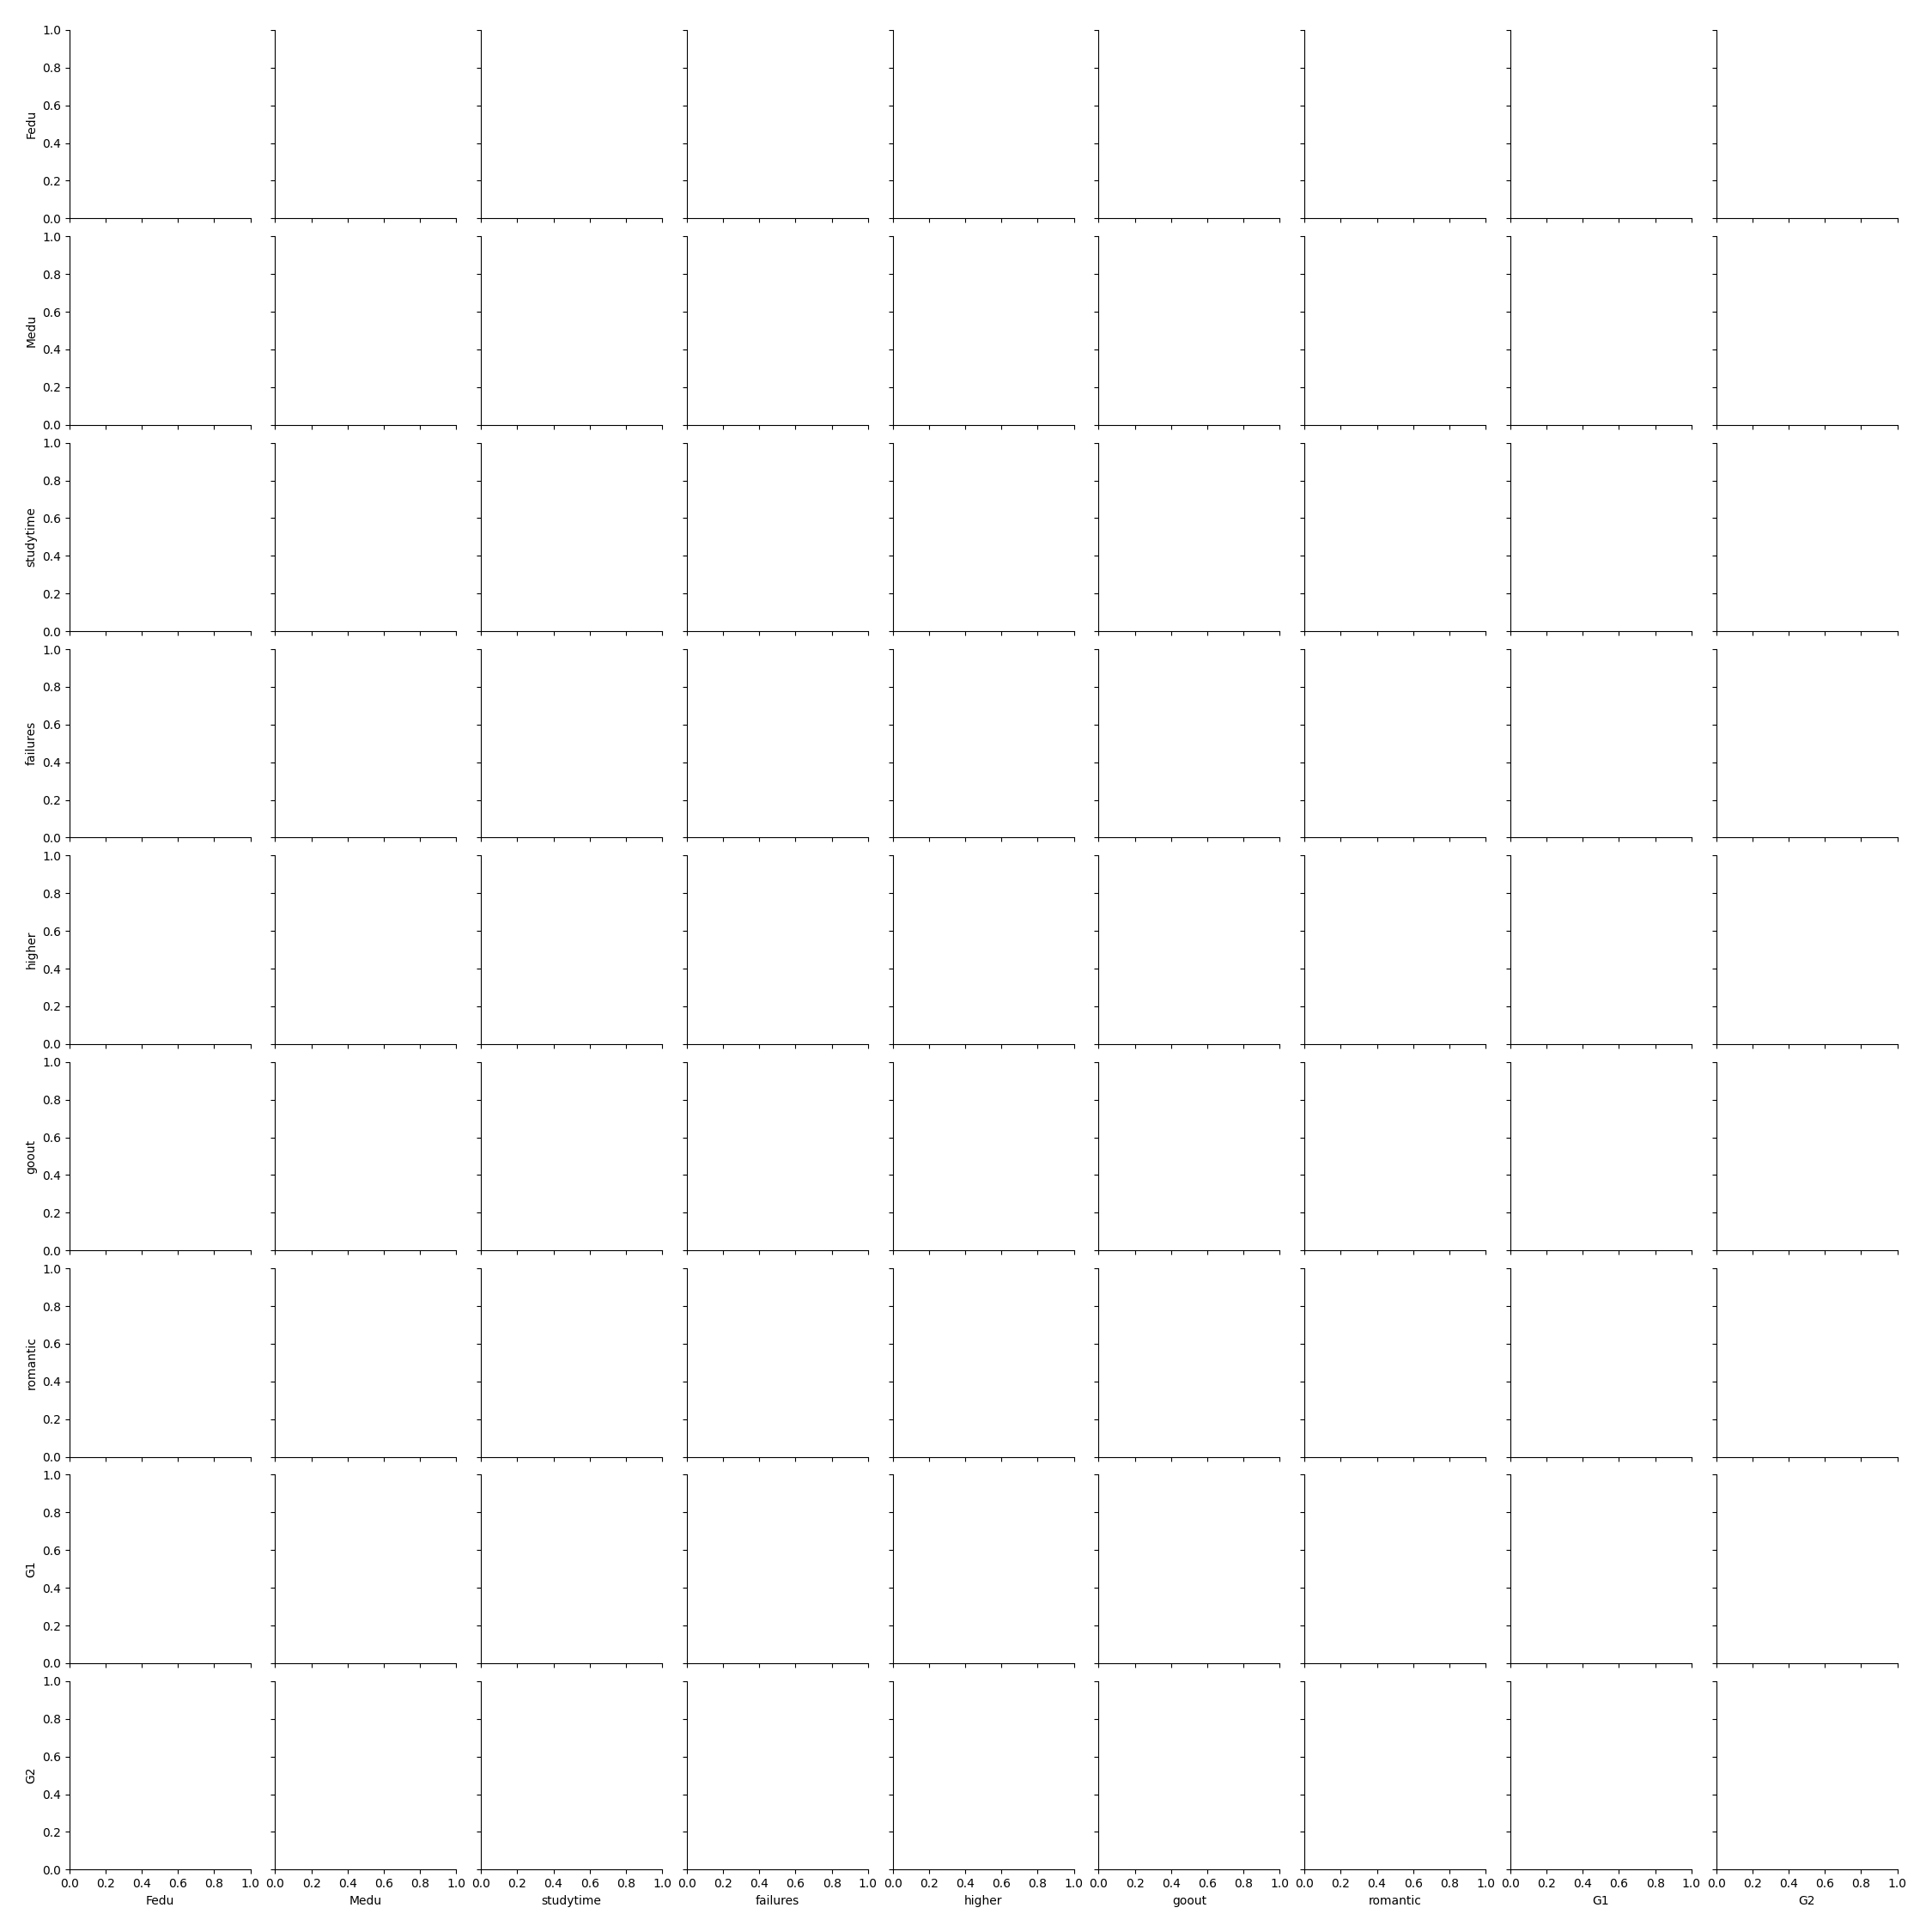

ValueError: cannot reindex from a duplicate axis

In [37]:
correlacio = sns.pairplot(correlacio_alta, hue='G3')
plt.show()

Així doncs ara podreu respondre a les següents preguntes:

1. Quin és el tipus de cada atribut? 
2. Quins atributs tenen una distribució Guassiana?
3. Quin és l'atribut objectiu? Per què?

# Apartat (B): Primeres regressions

Per a aquest primer apartat es calcularà l'error quadràtic mitjà només del regressor per a cada un dels atributs de la base de dades, determinant aquell atribut pel qual l'error quadràtic mitjà (entre el valor predit i el real, per a cada mostra) és més baix. 

A continuació se us dona una funció auxiliar per a calcular l'error quadràtic mitjà:

In [18]:
import math

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

Per a agilitzar els càlculs es recomana utilitzar la llibreria numpy. Aquesta llibreria ens permet processar vectors sencers a la vegada de manera eficient i en paral·lel. Exemple:

In [14]:
import numpy as np #importem la llibreria
np.warnings.filterwarnings('ignore')

vector1 = np.array([1,2,3,4]) # convertim llista de python a numpy array
vector2 = np.array([1,2,1,4]) 

# podem sumar dos vectors element a element
print("Suma vector1 + vector2 ", vector1 + vector2)

# podem sumar tots els valors d'un vector
print("Suma valors vector1 ", vector1.sum())

# calculem la mitjana
print("Mitjana vector1", vector1.mean())

# utilitzem un vector com a índex de l'altre
# vector3 = vector1  # necesitem fer una copia del vector per no modificar el original
vector3 = vector1.copy()
vector3[vector2 == 1] = 5
print("Vector1 amb un 5 on el Vector2 te 1s ", vector3)

# es pot utilitzar numpy per a calcular el mse
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

print("MSE: ", mse(vector1, vector2))

Suma vector1 + vector2  [2 4 4 8]
Suma valors vector1  10
Mitjana vector1 2.5
Vector1 amb un 5 on el Vector2 te 1s  [5 2 5 4]
MSE:  1.0


Per a la regressió podeu utilitzar la llibreria sklearn:

In [19]:
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

Finalment, si la funció `fit` del regressor logístic dónes l'error: `ValueError: Unknown label type: 'unknown'`, caldria afegir a la definició de l'atribut a trobar $y$ la crida a la funció `.astype('int')` per tal de obligar a que les dades siguin de tipus sencer, deixant el codi com segueix:

`y = data[:,2].astype('int')`

A continuació, es modificaran tots els atributs mitjançant **procediments de normalització (normal, estàndard)**, i s'avaluarà el rendiment del regressor après. Per a això, caldrà analitzar la mitja i variança de cada variable per totes les mostres, per identificar aquells valors que tenen una distribució normal, els preferits per fer regressió, i descartar altres atributs que no són representatius per fer la regressió, i que afegeixen soroll al model. 

Pel que fa a l'error resultant de la regressió, recordeu que es calcula fent la diferència entre el valor predit i el real al quadrat: així doncs, si les dades tenen valors grans (tipus 10^3), l'error al quadrat podria acabar sent 10^6. Per això és important normalitzar abans (escalar les dades a un rang més petit).

<img src="images/standarization.png">

Podeu estandarditzar les dades amb les funcions mean i std de numpy i mostrar l'hisotgrama de nou. Recuperant l'exemple de l'apartat anterior:

In [20]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

Ara ja podeu comprovar la diferència entre entrenar amb els atributs estandaritzats i si aquells que tenen una distribució més semblant a la normal donen millors resultats. 
Finalment, s'aprendrà un model regressor tenint en compte tots aquells atributs que tenen una millor distribució de valors (lineal, això és, l'histograma de valors té forma de gaussiana), i es calcularà l'error assolit en la predicció. 

Recordeu que el valor sobre el que heu de fer la regressió queda al vostre criteri: **heu d'explicar a la memòria quin atribut heu fet servir, no hi ha una decisió única correcta, cal que doneu raons de per què heu triat l'atribut que hàgiu triat.**

Així per exemple pode mirar:

* Que l'objectiu de la regressió sigui un valor ordinal (1 > 2 > 3). Si no n'hi ha cap, explicar-ho a la memòria.

* Que sigui útil en alguna aplicació real (per exemple predir si plourà és més interessant que predir el color dels núvols).

* Que tingui certa variació (un atribut que és sempre 0, no té gaire interès)

I en definitiva explicar el criteri a seguir, tant amb paraules com amb gràfiques (per exemple histograma), o estadístiques (per exemple la variança dels atributs) si escau.

Un cop escollit l'atribut objectiu, caldrà justificar si l'error obtingut és, en proporció, menor que tenint en compte únicament el millor atribut identificat al primer punt. 

Posem l'atribut G3 al final del dataframe per què sigui més fàcil el processament de dades.

In [21]:
df_ca.columns

Index(['Fedu', 'Medu', 'studytime', 'failures', 'higher', 'goout', 'romantic',
       'G1', 'G2', 'G3'],
      dtype='object')

In [41]:
df_ca.head()

Fedu  Medu  studytime  failures  higher  goout  romantic  G1  G2  G3
0     4     4          2         0       1      4         0   5   6   6
1     1     1          2         0       1      3         0   5   5   6
2     1     1          2         3       1      2         0   7   8  10
3     2     4          3         0       1      2         1  15  14  15
4     3     3          2         0       1      2         0   6  10  10

Observem la normalitat de les dades normalitzades


<IPython.core.display.Javascript object>


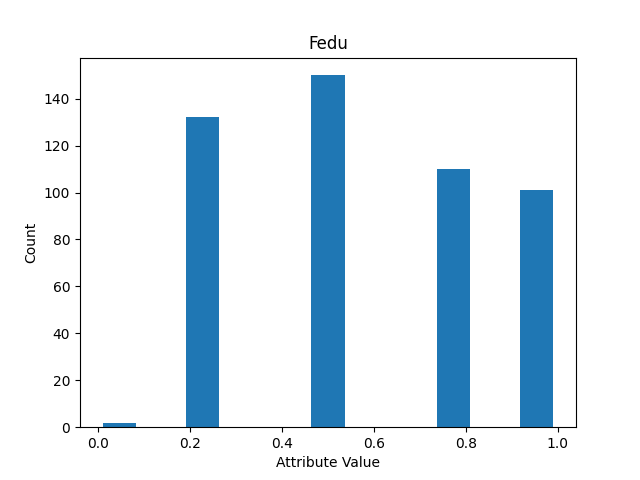

no segueix una distribució normal


<IPython.core.display.Javascript object>


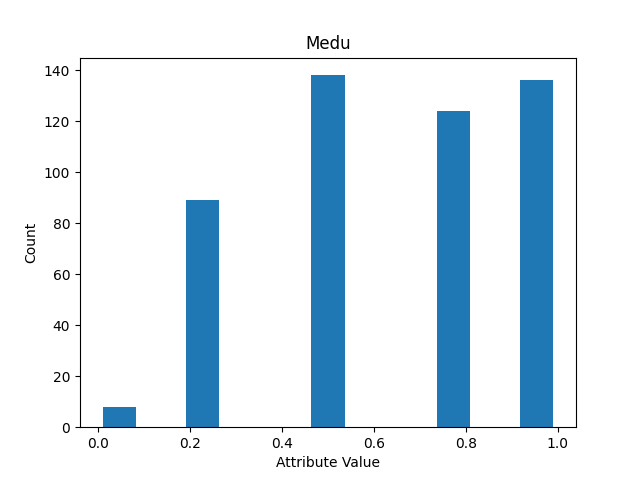

no segueix una distribució normal


<IPython.core.display.Javascript object>


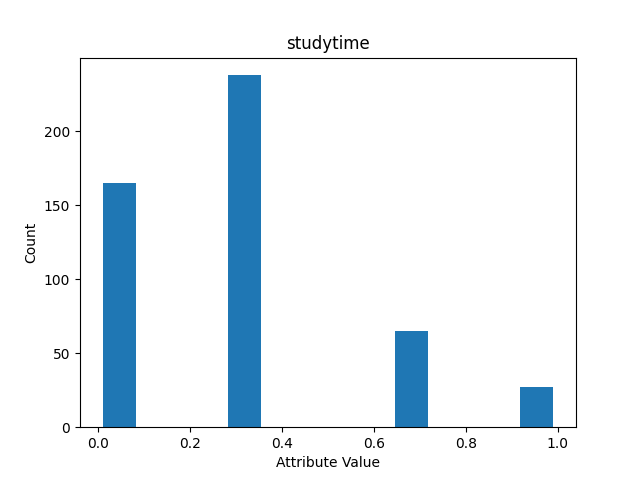

no segueix una distribució normal


<IPython.core.display.Javascript object>


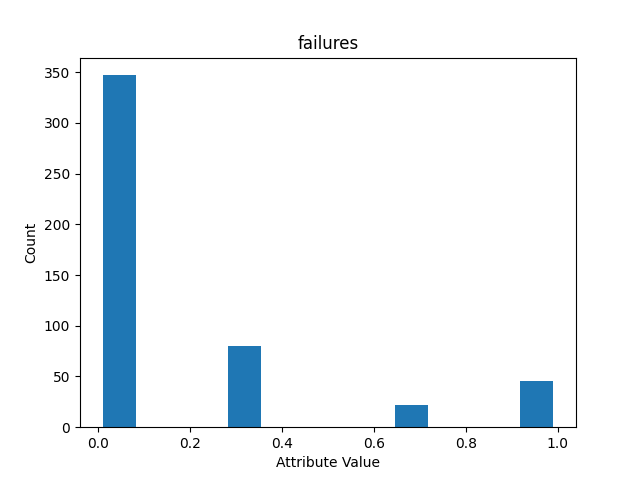

no segueix una distribució normal


<IPython.core.display.Javascript object>


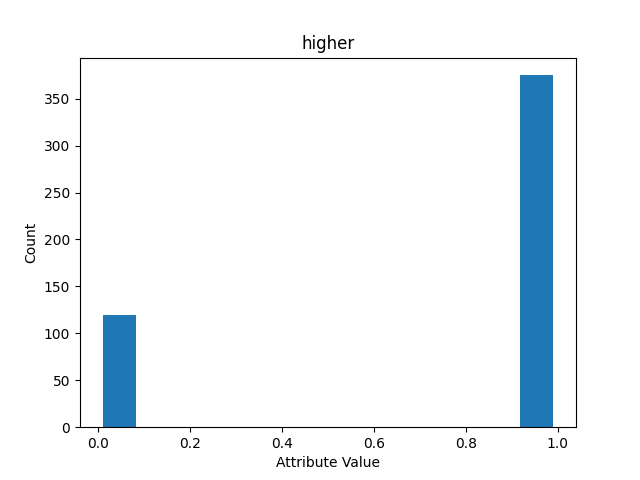

no segueix una distribució normal


<IPython.core.display.Javascript object>


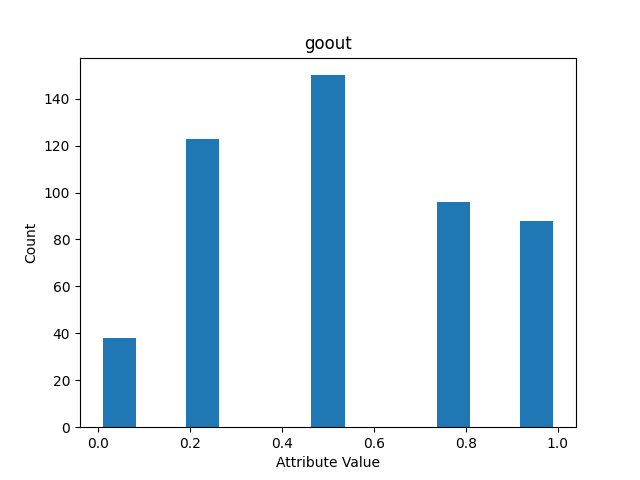

no segueix una distribució normal


<IPython.core.display.Javascript object>


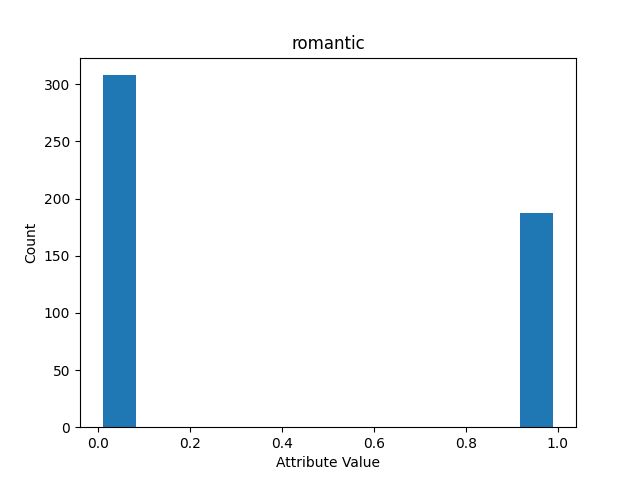

no segueix una distribució normal


<IPython.core.display.Javascript object>


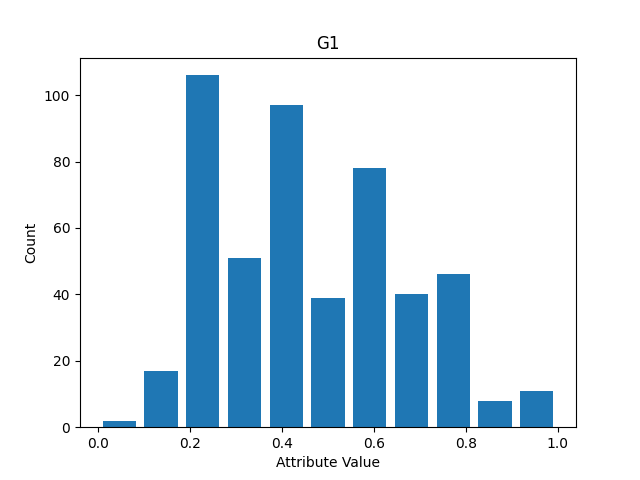

no segueix una distribució normal


<IPython.core.display.Javascript object>


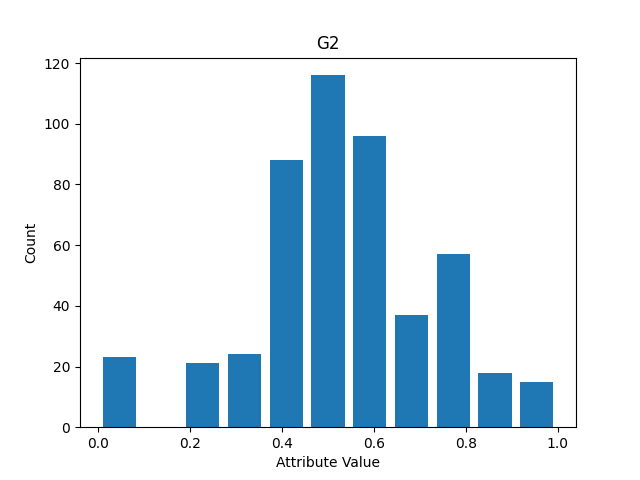

no segueix una distribució normal


<IPython.core.display.Javascript object>


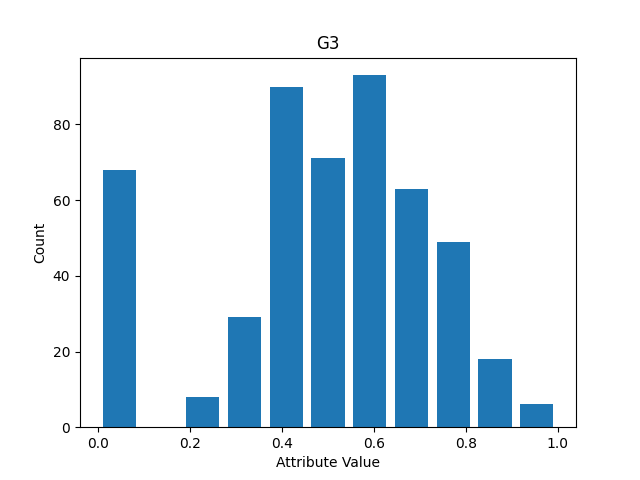

no segueix una distribució normal


In [73]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


x_non = df_ca.values
x_non = x_non[:, :10]

x_sin = df_ca.values
x_sin = x_sin[:, :10]

min_max_scaler=preprocessing.MinMaxScaler()   #normalitzem les dades en un rang de 0 a 1
x_sin=min_max_scaler.fit_transform(x_sin)

#x_sin = standarize(x_sin)

print('Observem la normalitat de les dades normalitzades')
lista = [0,1,2,3,4,5,6,7,8,9]
for i in lista: 
    plt.figure()
    plt.title(df_ca.columns[i])
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    histN = plt.hist(x_sin[:,i], bins=11, range=[np.min(x_sin[:,i]), np.max(x_sin[:,i])], histtype="bar", rwidth=0.8)
    stat,p=normaltest(x_sin[:,i])
    alpha = 0.005
    if p < alpha:
        print('no segueix una distribució normal')
    else:
        print('si segueix una distribució normal')

Ara que hem carregat les dades podem entrenar un regressor lineal per a aproximar la funció que les genera:

In [38]:
from sklearn.metrics import r2_score

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.

y_non = x_non[:, 9]
y_sin = x_sin[:, 9]

x_non = x_non[:, :9]
x_sin = x_sin[:, :9]
#regressor amb dades no normalitzades
print("Regressor amb dades NO normalitzades")
for i in range(0,9):
    atribut = x_non[:,i].reshape(x_non.shape[0], 1) 
    regr = regression(atribut, y_non) 
    predicted = regr.predict(atribut)

    plt.figure()
    axN = plt.scatter(x_non[:,i], y_non)
    plt.plot(atribut[:,0], predicted, 'r')

    MSE = mse(y_non, predicted)
    r2 = r2_score(y_non, predicted)

    print("Mean squeared error atribut ", df_ca.columns[i],  ": ", MSE)
    print("R2 score: ", r2)

## regressor amb dades normalitzades
print("Regressor amb dades normalitzades")
for i in range(0,9):
    atribut = x_sin[:,i].reshape(x_sin.shape[0], 1) 
    regr = regression(atribut, y_sin) 
    predicted = regr.predict(atribut)

    plt.figure()
    axN = plt.scatter(x_sin[:,i], y_sin)
    plt.plot(atribut[:,0], predicted, 'r')

    MSE = mse(y_sin, predicted)
    r2 = r2_score(y_sin, predicted)

    print("Mean squeared error atribut ", df_ca.columns[i],  ": ", MSE)
    print("R2 score: ", r2)

NameError: name 'x_non' is not defined

Un cop mostrats de manera adient, (en forma de taula, i/o de gràfics si la dimensionalitat ho permet) els resultats aconseguits amb la regressió, avaluarem de manera independent la idonietat de cadascun dels atributs.

In [16]:
""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.
"""
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament   

print("Amb dades NO normalitzades")
x_train, y_train, x_val, y_val = split_data(x_non, y_non) 

for i in range(x_train.shape[1]):
    x_t1 = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v1 = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t1 = np.reshape(x_t1,(x_t1.shape[0],1))
    x_v1 = np.reshape(x_v1,(x_v1.shape[0],1))

    regr = regression(x_t1, y_train)    
    error = mse(y_val, regr.predict(x_v1)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v1))
    
    if error < 20.00:
        print("Error en atribut %s: %f" %(df.columns[i], error))
        print("R2 score en atribut %s: %f" %(df.columns[i], r2))  ## entre 0 (fatal) i 1(molt be) 

print("Amb dades normalitzades")
x_train, y_train, x_val, y_val = split_data(x_sin, y_sin) #--> SENSE DADES NORMALITZADES SURT MILLOR

for i in range(x_train.shape[1]):
    x_t1 = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v1 = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t1 = np.reshape(x_t1,(x_t1.shape[0],1))
    x_v1 = np.reshape(x_v1,(x_v1.shape[0],1))

    regr = regression(x_t1, y_train)    
    error = mse(y_val, regr.predict(x_v1)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v1))
    
    if error < 1:
        print("Error en atribut %s: %f" %(df.columns[i], error))
        print("R2 score en atribut %s: %f" %(df.columns[i], r2))  ## entre 0 (fatal) i 1(molt be) 


Amb dades NO normalitzades
Error en atribut G1: 8.503399
R2 score en atribut G1: 0.655834
Error en atribut G2: 3.810306
R2 score en atribut G2: 0.845782
Amb dades normalitzades
Error en atribut sex: 0.066295
R2 score en atribut sex: -0.041139
Error en atribut age: 0.062126
R2 score en atribut age: 0.024342
Error en atribut Medu: 0.063612
R2 score en atribut Medu: 0.001003
Error en atribut Fedu: 0.064976
R2 score en atribut Fedu: -0.020422
Error en atribut traveltime: 0.063464
R2 score en atribut traveltime: 0.003323
Error en atribut studytime: 0.064328
R2 score en atribut studytime: -0.010238
Error en atribut failures: 0.054050
R2 score en atribut failures: 0.151161
Error en atribut schoolsup: 0.066021
R2 score en atribut schoolsup: -0.036836
Error en atribut famsup: 0.064887
R2 score en atribut famsup: -0.019027
Error en atribut paid: 0.063666
R2 score en atribut paid: 0.000147
Error en atribut activities: 0.065271
R2 score en atribut activities: -0.025051
Error en atribut higher: 0.0

Regressió multivariada amb dades no normalitzades

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_non, y_non, test_size=0.2, random_state=123)
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

print("The intercept term of the linear model:", lm.intercept_)

list_col = list(df_ca.columns)
list_col.remove("G3")
cdf = pd.DataFrame(data=lm.coef_, index=list_col, columns=["Coefficients"])
print(cdf)

train_pred=lm.predict(X_train)
print("MSE value of this fit:",round(metrics.mean_squared_error(y_train,train_pred),3))

NameError: name 'x_non' is not defined

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_sin, y_sin, test_size=0.2, random_state=123)
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

print("The intercept term of the linear model:", lm.intercept_)

#l_column.remove("G3")
cdf = pd.DataFrame(data=lm.coef_, index=list_col, columns=["Coefficients"])
print(cdf)

train_pred=lm.predict(X_train)
print("MSE value of this fit:",round(metrics.mean_squared_error(y_train,train_pred),3))

The intercept term of the linear model: -0.06194602081422301
           Coefficients
Fedu             -0.015
Medu              0.000
studytime        -0.019
failures         -0.005
higher            0.011
goout             0.008
romantic         -0.017
G1                0.133
G2                0.936
MSE value of this fit: 0.009


Entrenem el mateix model pero de les dades anteriors nomes agafem les que tenen un coeficient més gran que 0.01, mirem si obtenim millor mse. 

In [79]:
proba = pd.concat([df["G3"],df["G1"], df["G2"], df["Fedu"], df["studytime"], df["higher"], df["romantic"]], axis = 1)
proba1 = proba.values
y_proba = proba1[:, 0]
x_proba = proba1[:, 1:]

l_column_alta = proba.columns[1:]

X_train, X_test, y_train, y_test = train_test_split(x_proba, y_proba, test_size=0.2, random_state=123)
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

print("The intercept term of the linear model:", lm.intercept_)

#l_column.remove("G3")
cdf = pd.DataFrame(data=lm.coef_, index=l_column_alta, columns=["Coefficients"])
print(cdf)

train_pred=lm.predict(X_train)
print("MSE value of this fit:",round(metrics.mean_squared_error(y_train,train_pred),3))

The intercept term of the linear model: -1.5812863910402495
           Coefficients
G1                0.165
G2                0.985
Fedu             -0.065
studytime        -0.126
higher            0.242
romantic         -0.344
MSE value of this fit: 3.535


In [82]:
proba = pd.concat([df["G3"],df["G1"], df["G2"], df["Fedu"], df["studytime"], df["higher"], df["romantic"]], axis = 1)

min_max_scaler=preprocessing.MinMaxScaler()   #normalitzem les dades en un rang de 0 a 1
proba1=min_max_scaler.fit_transform(proba)

y_proba = proba1[:, 0]
x_proba = proba1[:, 1:]

l_column_alta = proba.columns[1:]

X_train, X_test, y_train, y_test = train_test_split(x_proba, y_proba, test_size=0.2, random_state=123)
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

print("The intercept term of the linear model:", lm.intercept_)

#l_column.remove("G3")
cdf = pd.DataFrame(data=lm.coef_, index=l_column_alta, columns=["Coefficients"])
print(cdf)

train_pred=lm.predict(X_train)
print("MSE value of this fit:",round(metrics.mean_squared_error(y_train,train_pred),3))

The intercept term of the linear model: -0.060554421916413526
           Coefficients
G1                0.132
G2                0.936
Fedu             -0.013
studytime        -0.019
higher            0.012
romantic         -0.017
MSE value of this fit: 0.009


Ara utilitzem només les dades més correlacionades amb un coeficient de 0.015

In [84]:
proba = pd.concat([df["G3"],df["G1"], df["G2"], df["studytime"], df["romantic"]], axis = 1)

y_proba = proba1[:, 0]
x_proba = proba1[:, 1:]

l_column_alta = proba.columns[1:]

X_train, X_test, y_train, y_test = train_test_split(x_proba, y_proba, test_size=0.2, random_state=123)
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

print("The intercept term of the linear model:", lm.intercept_)

#l_column.remove("G3")
cdf = pd.DataFrame(data=lm.coef_, index=l_column_alta, columns=["Coefficients"])
print(cdf)

train_pred=lm.predict(X_train)
print("MSE value of this fit:",round(metrics.mean_squared_error(y_train,train_pred),3))

The intercept term of the linear model: -0.06142966449037207
           Coefficients
G1                0.132
G2                0.939
studytime        -0.013
romantic         -0.019
MSE value of this fit: 0.009


Fem el mateix però amb les dades normalitzades

In [90]:
proba = pd.concat([df["G3"],df["G1"], df["G2"], df["romantic"]], axis = 1)

min_max_scaler=preprocessing.MinMaxScaler()   #normalitzem les dades en un rang de 0 a 1
proba1=min_max_scaler.fit_transform(proba)

y_proba = proba1[:, 0]
x_proba = proba1[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(x_proba, y_proba, test_size=0.2, random_state=123)
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

print("The intercept term of the linear model:", lm.intercept_)

#l_column.remove("G3")
cdf = pd.DataFrame(data=lm.coef_, index=l_column_alta[:-1], columns=["Coefficients"])
print(cdf)

train_pred=lm.predict(X_train)
print("MSE value of this fit:",round(metrics.mean_squared_error(y_train,train_pred),3))

The intercept term of the linear model: -0.06357830405017179
           Coefficients
G1                0.129
G2                0.938
studytime        -0.020
MSE value of this fit: 0.009


**PCA**


Quan es treballa en dades n-dimensionals (més d'un atribut), una opció és reduir la seva n-dimensionalitat aplicant un Principal Component Analysis (PCA) i quedar-se amb els primers 2 o 3 components, obtenint unes dades que (ara sí) poden ser visualitzables en el nou espai. Existeixen altres embeddings de baixa dimensionalitat on poder visualitzar les dades?

In [ ]:
df.head()

In [91]:
# Treballem amb PCA
dst_senseG3 = df_ca.drop(df_ca.columns[9], axis = 1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

dst_senseG3[dst_senseG3.columns] = ss.fit_transform(dst_senseG3[dst_senseG3.columns])  ##nornalitzacio de dades --> mitjana 0, desviació tipica 1

dst_senseG3.head()


Fedu   Medu  studytime  failures  higher  goout  romantic     G1     G2
0  1.504  1.264      0.113    -0.559   0.566  0.711    -0.779 -1.591 -1.073
1 -1.240 -1.421      0.113    -0.559   0.566 -0.123    -0.779 -1.591 -1.333
2 -1.240 -1.421      0.113     2.611   0.566 -0.957    -0.779 -1.001 -0.553
3 -0.325  1.264      1.331    -0.559   0.566 -0.957     1.283  1.360  1.008
4  0.590  0.369      0.113    -0.559   0.566 -0.957    -0.779 -1.296 -0.033

In [93]:
pca2 = PCA(n_components=2, random_state=42)
pca_2 = pca2.fit_transform(dst_senseG3[dst_senseG3.columns])

# Creem un dataset amb les dues components principals

df_2 = pd.DataFrame({'PC1' : pca_2[:,0], 'PC2' : pca_2[:,1], 'G3': df[df_ca.columns[9]]})
df_2.head()

PC1    PC2  G3
0 -0.201 -2.542   6
1  1.531  0.616   6
2  2.125  1.458  10
3 -2.051  0.456  15
4 -0.440 -0.499  10

<IPython.core.display.Javascript object>


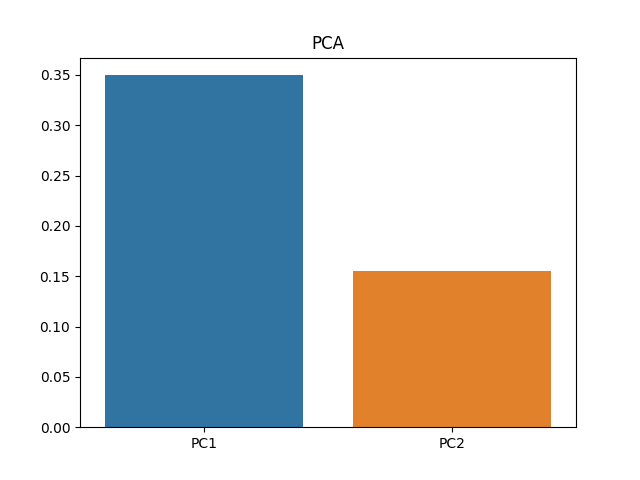

<AxesSubplot: title={'center': 'PCA'}>

In [94]:
pca2.explained_variance_ratio_ # variança de les dues variables
pca2.explained_variance_ratio_.sum() #cuanta variança tenen aquestes dues components principals envers a totes les altres

plt.figure()
plt.title("PCA")
sns.barplot(x=['PC1', 'PC2'], y=pca2.explained_variance_ratio_)

<IPython.core.display.Javascript object>


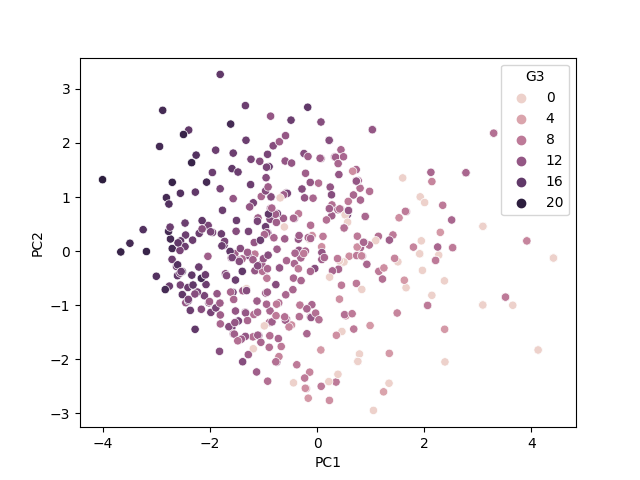

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

In [95]:
plt.figure()
sns.scatterplot(x='PC1', y='PC2', hue=df_ca[df_ca.columns[9]], data=df_2)

# no es poden disntingir les clases i amb PCA

<IPython.core.display.Javascript object>


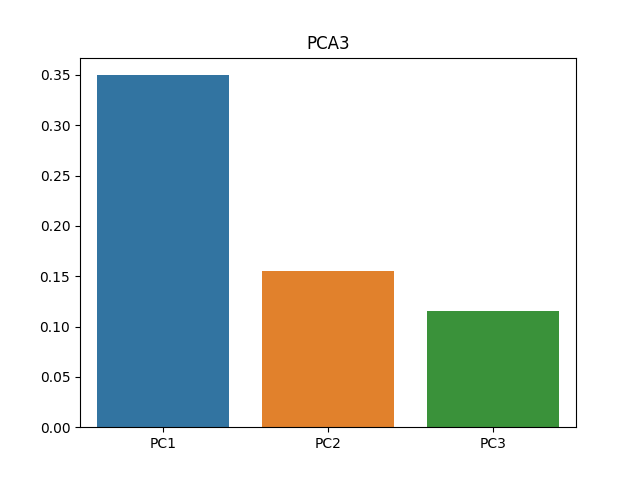

<AxesSubplot: title={'center': 'PCA3'}>

In [96]:
# PCA 3

pca3 = PCA(n_components=3, random_state=42) 
pca_3 = pca3.fit_transform(dst_senseG3[dst_senseG3.columns])

# Creem un dataset amb les dues components principals

df_3 = pd.DataFrame({'PC1' : pca_3[:,0], 'PC2' : pca_3[:,1], 'PC3' : pca_3[:,2], 'G3': df[df.columns[36]]})
df_3.head()

pca3.explained_variance_ratio_ # variança de les dues variables
pca3.explained_variance_ratio_.sum() #cuanta variança tenen aquestes dues components principals envers a totes les altres

plt.figure()
plt.title("PCA3")
sns.barplot(x=['PC1', 'PC2', 'PC3'], y=pca3.explained_variance_ratio_)



<IPython.core.display.Javascript object>


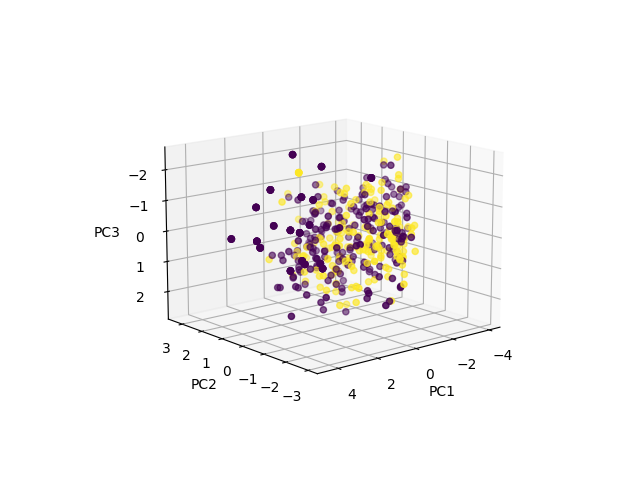

In [97]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = df_3['PC1']
y = df_3['PC2']
z = df_3['PC3']

ax.scatter(x,y,z,c=df[df.columns[9]],marker='o')


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

Així es podrà contestar a aquestes **preguntes**:

1. Quin són els atributs més importants per fer una bona predicció?
G1, G2 (menys error)

2. Amb quin atribut s'assoleix un MSE menor?
G1,G2, per tant, probarem a treurels i fer combinacions d'altres atributs

3. Quina correlació hi ha entre els atributs de la vostra base de dades?
molt poca

4. Com influeix la normalització en la regressió?

5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?

6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?

Al aplicar un PCA, l'espai es redueix fins a 2 o 3 components, ja que l'objectiu d'aplicar aquest algorisme es podre respresentar les dades en espai. Per tant, la representació de 2 o 3 components es factibla envers la representació de 36 dimensions que seria el nostre cas.

# Apartat (A): El descens del gradient  

En aquest exercici, es tracta d'implementar en python el procés de descent del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(w) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; w) - y^{i})^2 + \lambda\sum_{j=1}^{n}(w_{j}^2) \right]$$

Fixeu-vos que $J$ retorna el `mse`. Per a trobar $w_j$, repetir fins convergència:
$$w_0 = w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot 1$$
$$w_j = w_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}w_{j} \right]$$


ó:

$$w_{j} := w_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $w_0$ i $w_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabeu quin resultat hauríeu d'obtenir. O no, perquè la vostra implementació pot ser millor! En concret, es tracta de desenvolupar aquestes tasques:

* Definir la funció de cost i del gradient

* Estudiar com l'ús de regularitzadors afecta el resultat: overfitting, underfitting, etc. 

* Visualització de les dades a analitzar i explicació pas a pas del procediment   

* Visualització del procés de descens de gradient 

* Modificar el learning rate i el nombre d'iteracions 

<img src="images/gradient_descent.png">

Per a la implementació us podeu basar en el següent esquelet:

In [36]:
import copy as cp
import numpy as np
from matplotlib import pyplot as plt
class Regressor(object):
    def __init__(self, w, alpha, train, y):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w = cp.deepcopy(w) # [w0, ...w8]
        self.alpha = alpha
        self.train = cp.deepcopy(train)
        self.errores = []
        self.y = y
        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        columna = 0
        datos = cp.deepcopy(x)
        for indice in range(1,len(self.w)):
           datos[:,columna] = datos[:,columna]*self.w[indice]
           columna += 1
        datos = datos + self.w[0]
        predicciones = np.sum(datos, axis = 1)
        return predicciones

    def calcularError(self,y_validarPred, y):
        restas = np.add(y_validarPred,-y)
        cuadrados = np.power(restas,2)
        costeTotal = (1/(len(y))) * np.sum(cuadrados)
        return costeTotal
    
    def __update(self, hy, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        restas = np.add(hy,-y)
        cuadrados = np.power(restas,2)
        costeTotal = (1/(len(y))) * np.sum(cuadrados) #Creo que len(y) = m
        self.errores.append(costeTotal)
        for i in range(len(self.w)):
            self.w[i] = self.w[i] - self.alpha * (costeTotal + (self.epsilon/len(y))*self.w[i])

    
    def trains(self, max_iter, epsilon):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        self.epsilon = epsilon
        for i in range(max_iter):
            prediccio = self.predict(self.train)
            self.__update(prediccio, self.y)
        plt.figure()
        plt.scatter(range(max_iter),self.errores)


EMPIEZA EL REGRESSOR


<IPython.core.display.Javascript object>


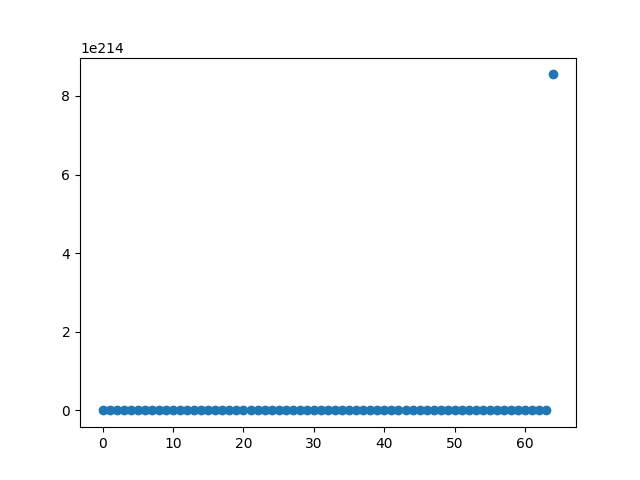

FINALIZA EL REGRESSOR
El error que nos da con el conjunto de validacion es de:  nan
Mean squeared error:  5.64498395872572  G3 normalizado:  10.074766355140186
El porcentaje de error general es  56.03091684449463
R2 score:  0.7484747174802462
TEST
El error que nos da el error de test es:  nan
Mean squeared error:  1.7450660389747021  G3 normalizado tiene un valor de  10.05
El porcentaje de error general es  17.36384118382788
R2 score:  0.8942223949704682


In [40]:
train,test=train_test_split(df,test_size=0.1)
entrenar,validar=train_test_split(train,test_size=0.3)  
y = entrenar['G3'].to_numpy()
entrenar.drop('G3',inplace=True,axis=1)
regr = regression(entrenar.to_numpy(),y)
    
print("EMPIEZA EL REGRESSOR")
w = np.random.uniform(0.001,0.5,9)
s=Regressor(w, 0.0001,entrenar.to_numpy(),y)
s.trains(10000,0.1)
print("FINALIZA EL REGRESSOR")


y = validar['G3'].to_numpy()
X=y.mean()
validar.drop('G3',inplace=True,axis=1)
predicciones = s.predict(validar.to_numpy())
errorVal = s.calcularError(predicciones,y)
print("El error que nos da con el conjunto de validacion es de: ", errorVal)
predicted = regr.predict(validar.to_numpy())
dif = y - predicted
# Mostrem l'error (MSE i R2)

MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE, " G3 normalizado: ", X)
VAR= 100*MSE/X
print("El porcentaje de error general es ",VAR)
print("R2 score: ", r2)

print ("TEST")
y = test['G3'].to_numpy()
X=y.mean()
test.drop('G3',inplace=True,axis=1)
predicciones = s.predict(test.to_numpy())
errorVal = s.calcularError(predicciones,y)
print("El error que nos da el error de test es: ", errorVal)
predicted = regr.predict(test.to_numpy())
dif = y - predicted
# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE, " G3 normalizado tiene un valor de ", X)
VAR= 100*MSE/X
print("El porcentaje de error general es ",VAR)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


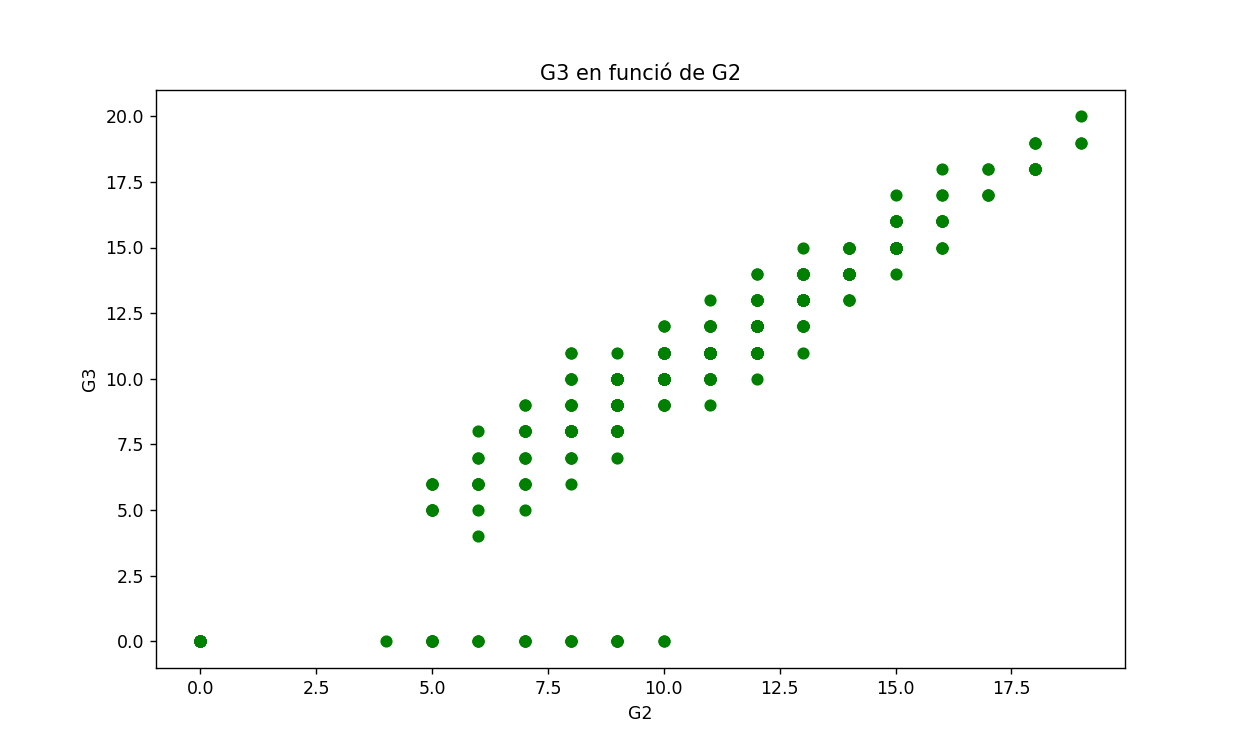

In [33]:
## Regresor Lineal 
## volem predir G3 
## utilitzem G2 que es l'atribut amb mse mes baix

x = df[['G2']]
y = y_non

plt.figure(figsize=(10,6))
plt.xlabel('G2')
plt.ylabel('G3')
plt.title('G3 en funció de G2')
plt.scatter(x,y, marker='o', color='g')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  

# observations / data
x = np.array(xN[:,13])
y = np.array(xN[:,14])

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

plt.figure()
# plotting the actual points as scatter plot
plt.scatter(x, y, color = "m",
           marker = "o", s = 30)

# predicted response vector
y_pred = b[0] + b[1]*x

# plotting the regression line
plt.plot(x, y_pred, color = "g")

# putting labels
plt.xlabel('x')
plt.ylabel('y')

# function to show plot
plt.show()
  

L'últim pas serà validar el regressor trobat pel descent del gradient desenvolupat en aquest apartat visualment, aplicat a un model de recta i un model de pla. Per a això, caldrà considerar el millor atribut identificat en el primer punt de l'anterior entrega per visualitzar la línia regressora en 2D (podeu mostrar dades 2d amb la funció scatter). Després, dos dels atributs identificats a l'últim punt del primer exercici per visualitzar el pla regressor en 3D (En el cas 3D l’scatter s’ha de fer sobre una figura amb projecció 3D).

In [ ]:
%matplotlib notebook

# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple
x_val = np.random.random((100, 2))
y_val = np.random.random((100, 1))
regr = regression(x_val, y_val)
predX3D = regr.predict(x_val)

# Afegim els 1's
A = np.hstack((x_val,np.ones([x_val.shape[0],1])))
w = np.linalg.lstsq(A,predX3D)[0]

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[0] * xplot + w[1] * yplot + w[2]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x_val[:,0],x_val[:,1],y_val)

Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? Quins valors de learning rate convergeixen més ràpid a la solució òptima? Com influeix la inicialització del model en el resultat final? 

2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?

3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?

3. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?

4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 

5. Ajuda la visualització a identificar aquelles mostres per a les que el regressor obté els pitjors resultats de predicció? 


In [ ]:
# Proves per aoncseguir millor rendiment:
#creem atribut G12: mitjana entre G1 i G2

print(x_sin)
dst_G12 = (x_sin[:, 34] + x_sin[:, 35]) /2.0
col = ['G12_mitja']
dataset_G12 = pd.DataFrame(dst_G12, columns=col)
dataset = pd.concat([df, dataset_G12], axis = 1)

#representem el regressor per G12
dataN = dataset.values
xN = dataN[:, :36]
atribut1N = xN[:,35].reshape(xN.shape[0], 1) 
regrN = regression(atribut1N, yN) 
predictedN = regrN.predict(atribut1N)

plt.figure()
axN = plt.scatter(xN[:,59], yN)
plt.plot(atribut1N[:,0], predictedN, 'r')

MSEN = mse(yN, predictedN)
r2N = r2_score(yN, predictedN)

print("Mean squeared error atribut ", dataset.columns[59], ": ", MSEN)
print("R2 score: ", r2N)

In [ ]:
g12 = xN[:, 13]*0.15+xN[:, 14]*0.85  #millor combinacio dels atributs, s'ha aconseguit canviant la ponderació
col = ['G12_pond']
dataset_G12 = pd.DataFrame(g12, columns=col)
dataset = pd.concat([dataset, dataset_G12], axis = 1)

dataN = dataset.values
xN = dataN[:, :61]
atribut1N = xN[:,60].reshape(xN.shape[0], 1) 
regrN = regression(atribut1N, yN) 
predictedN = regrN.predict(atribut1N)

MSEN = mse(yN, predictedN)
r2N = r2_score(yN, predictedN)

print("Mean squeared error atribut ", dataset.columns[60], ": ", MSEN)
print("R2 score: ", r2N)

#provem de sumar els valors de l'educació dels pares per obtenir un nou atribut
nivell_ed = xN[:, 1] + xN[:, 2] + 5*xN[:, 44]
col = ['nivell_ed_pares + suport']
dataset_2 = pd.DataFrame(nivell_ed, columns=col)
dataset = pd.concat([dataset, dataset_2], axis = 1)

dataN = dataset.values
xN = dataN[:, :62]
atribut1N = xN[:,61].reshape(xN.shape[0], 1) 
regrN = regression(atribut1N, yN) 
predictedN = regrN.predict(atribut1N)

MSEN = mse(yN, predictedN)
r2N = r2_score(yN, predictedN)

print("Mean squeared error atribut ", dataset.columns[61], ": ", MSEN)
print("R2 score: ", r2N)

#afegim importancia a failures + absences + no_fam_sup
fail_ab = xN[:, 5]*2+ xN[:, 12]*0.15
col = ['fail + abs']
dataset_3 = pd.DataFrame(fail_ab, columns=col)
dataset = pd.concat([dataset, dataset_3], axis = 1)
dataN = dataset.values
xN = dataN[:, :63]
atribut1N = xN[:,62].reshape(xN.shape[0], 1) 
regrN = regression(atribut1N, yN) 
predictedN = regrN.predict(atribut1N)

MSEN = mse(yN, predictedN)
r2N = r2_score(yN, predictedN)

print("Mean squeared error atribut ", dataset.columns[62], ": ", MSEN)
print("R2 score: ", r2N)

#nomes failures
fail_ab = xN[:, 5]*2
col = ['fail']
dataset_3 = pd.DataFrame(fail_ab, columns=col)
dataset = pd.concat([dataset, dataset_3], axis = 1)
dataN = dataset.values
xN = dataN[:, :64]
atribut1N = xN[:,63].reshape(xN.shape[0], 1) 
regrN = regression(atribut1N, yN) 
predictedN = regrN.predict(atribut1N)

MSEN = mse(yN, predictedN)
r2N = r2_score(yN, predictedN)

print("Mean squeared error atribut ", dataset.columns[63], ": ", MSEN)
print("R2 score: ", r2N)

In [ ]:
print("Correlació amb nous atributs")
new_dataset = dataset.drop(dataset.columns[:59], axis=1)
new_dataset = pd.concat([dataset_G, new_dataset], axis = 1)
print(new_dataset)
correlacio = new_dataset.corr()
print(correlacio)
plt.figure()
ax1 = sns.heatmap(correlacio, annot=True, linewidths=.5)

**CANVI EN G3**

En comptes de fer una classificació per nota, intentem fer una classificació d'aprovar o no aprovar. Si G3 >= 10 aproves si G3 < 10 suspens.

In [ ]:
dataset = pd.read_csv('student-mat.csv')
dataN = datasetN.values

xN = dataN[:, :33]
yN = dataN[:, 32]

dataset.loc[dataset.G3 < 10, 'G3'] = 0
dataset.loc[dataset.G3 >= 10, 'G3'] = 1

def categorical_to_numerical(dataset, nom_columna):
    dummy = pd.get_dummies(dataset[nom_columna], prefix = nom_columna)
    dataset = dataset.drop(nom_columna, axis = 1)
    dataset = pd.concat([dataset,dummy], axis = 1)
    return dataset

for i in dataset.columns:
    if (dataset[i].dtype=='object'):
        datas
        et = categorical_to_numerical(dataset,i)

dataN = dataset.values
xN = dataN[:, :59]
yN = dataN[:, 15]  ##Un atribut concret quina dimensió té

In [ ]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades

print("Correlació més alta")
dataset_G = datasetN.drop(datasetN.columns[:13], axis = 1)
dataset_G = dataset_G.drop(dataset_G.columns[3:], axis = 1)
correlacioN = dataset_G.corr()
plt.figure()
ax = sns.heatmap(correlacioN, annot=True, linewidths=.5)

print("De l'atribut 0 a l'atribut 12 + datasetG")
dataset1 = datasetN.drop(datasetN.columns[16:], axis = 1)
correlacioN = dataset1.corr()
plt.figure()
ax = sns.heatmap(correlacioN, annot=True, linewidths=.5)

print("De l'atribut 16 a l'atribut 28 + datasetG")
dataset2 = datasetN.drop(datasetN.columns[:16], axis = 1)
dataset2 = dataset2.drop(datasetN.columns[28:], axis = 1)
dataset2 = pd.concat([dataset2,dataset_G], axis = 1)
correlacioN = dataset2.corr()
plt.figure()
ax = sns.heatmap(correlacioN, annot=True, linewidths=.5)

print("De l'atribut 17 a l'atribut 39 + datasetG")
dataset3 = datasetN.drop(datasetN.columns[:28], axis = 1)
dataset3 = dataset3.drop(datasetN.columns[39:], axis = 1)
dataset3 = pd.concat([dataset3,dataset_G], axis = 1)
correlacioN = dataset3.corr()
plt.figure()
ax = sns.heatmap(correlacioN, annot=True, linewidths=.5)

print("De l'atribut 39 a l'atribut 50 + datasetG")
dataset4 = datasetN.drop(datasetN.columns[:39], axis = 1)
dataset4 = dataset4.drop(datasetN.columns[50:], axis = 1)
dataset4 = pd.concat([dataset4,dataset_G], axis = 1)
correlacioN = dataset4.corr()
plt.figure()
ax = sns.heatmap(correlacioN, annot=True, linewidths=.5)

print("De l'atribut 50 a l'atribut 58 + datasetG")
dataset5 = datasetN.drop(datasetN.columns[:50], axis = 1)
dataset5 = pd.concat([dataset5,dataset_G], axis = 1)
correlacioN = dataset5.corr()
plt.figure()
ax = sns.heatmap(correlacioN, annot=True, linewidths=.5)


print(dataset)

In [ ]:
x_t = standarize(xN)

print("Regressor amb dades normalitzades")
for i in range(0,58):
    atribut1N = x_t[:,i].reshape(x_t.shape[0], 1) 
    regrN = regression(atribut1N, yN) 
    predictedN = regrN.predict(atribut1N)

    plt.figure()
    axN = plt.scatter(x_t[:,i], yN)
    plt.plot(atribut1N[:,0], predictedN, 'r')

    MSEN = mse(yN, predictedN)
    r2N = r2_score(yN, predictedN)

    print("Mean squeared error atribut ", datasetN.columns[i], ": ", MSEN)
    print("R2 score: ", r2N)